## DATA EXPLORATION NOTEBOOK

## Run data pipeline


In [14]:
#if needed, clear all previous processing
%reset -f

#This notebook imports the complete 10seaggregation set and reduce the size of the set in several steps, keeping the name of the df constant to save memory

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#Copy this cell to every new version of Main
#import dataframe
df = pd.read_parquet('/home/joelva/code/pgt-group-3/data/raw/10_sec_New/HECTORdataAggregated_20240506142622.parquet')

# Print the number of rows
print(f"Number of rows in the file: {len(df)}")

Number of rows in the file: 1087947


In [17]:
#check min/max values and number of rows

min_datetime = df['Vdatetime'].min()
max_datetime = df['Vdatetime'].max()

print(f"Minimum datetime: {min_datetime}")
print(f"Maximum datetime: {max_datetime}")

df.shape
print(df.shape)

Minimum datetime: 2022-08-01 04:04:5
Maximum datetime: 2023-08-01 16:02:5
(1087947, 61)


In [18]:
#drop rows after 13:00

# Convert 'datetime' column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Print number of rows before dropping
print(f'Number of rows before dropping: {len(df)}')

# Define the time boundaries
start_time = pd.Timestamp('04:00:00').time()
end_time = pd.Timestamp('13:00:00').time()

# Filter the DataFrame to keep only rows where the time is between 04:00 and 13:00
df = df[df['datetime'].dt.time.between(start_time, end_time)]

# Print number of rows after dropping
print(f'Number of rows after dropping: {len(df)}')




Number of rows before dropping: 1087947
Number of rows after dropping: 818674


In [19]:
#Remove sunday and saturdays from df


# Convert 'datetime' column to datetime type if it's not already
#df['datetime'] = pd.to_datetime(df['datetime'])

# Extract the day of the week (0=Monday, 6=Sunday)
df['day_of_week'] = df['datetime'].dt.weekday

# Print number of rows before dropping
print(f'Number of rows before dropping: {len(df)}')

# Filter out Saturdays (5) and Sundays (6)
df = df[~df['day_of_week'].isin([5, 6])]

# Drop the 'day_of_week' column as it's no longer needed
df = df.drop(columns=['day_of_week'])



# Print the first few rows of the filtered DataFrame to verify
print(df.head(2))

# If you want to proceed with further analysis, ensure 'datetime' is still the index
# Set 'datetime' as the index again if needed
#df.set_index('datetime', inplace=True)

# Print number of rows after dropping
print(f'Number of rows after dropping: {len(df)}')



Number of rows before dropping: 818674
            Vdatetime                datetime  BatMaxV  BatMinV  BatSOC  \
4  2022-08-01 04:04:5 2022-08-01 04:04:59.770      0.0      0.0     0.0   
5  2022-08-01 04:05:0 2022-08-01 04:05:09.780      0.0      0.0     0.0   

   BatTotalCurrent  BatTotalVoltage  CompOnOff  StopOnOff  ThrottlePerc  ...  \
4              NaN              0.0        0.0        0.0           0.0  ...   
5              NaN              0.0        0.0        0.0           0.0  ...   

   Is_Monday  Is_Saturday  Is_Sunday  Is_Thursday  Is_Tuesday  Is_Wednesday  \
4          1            0          0            0           0             0   
5          1            0          0            0           0             0   

   DistanceKM  MotorJoules  EEM  AltChange  
4         NaN          0.0  NaN        NaN  
5    0.001757          0.0  0.0        NaN  

[2 rows x 61 columns]
Number of rows after dropping: 582718


In [20]:
print(f'Columns currently in df: {df.columns}')

Columns currently in df: Index(['Vdatetime', 'datetime', 'BatMaxV', 'BatMinV', 'BatSOC',
       'BatTotalCurrent', 'BatTotalVoltage', 'CompOnOff', 'StopOnOff',
       'ThrottlePerc', 'BrakePerc', 'Signal', 'TotalDistance', 'FrontAxle',
       'RearAxle1', 'RearAxle2', 'CompPower', 'FC2AirFlow', 'FC2Cool',
       'FC2Current', 'FC2Volt', 'FC3AirFlow', 'FC3Cool', 'FC3Current',
       'FC3Volt', 'FC1AirFlow', 'FC1Cool', 'FC1Current', 'FC1Volt',
       'GPSAltitude', 'GPSLatitude', 'GPSLongitude', 'H2Perc', 'H2Press',
       'H2Temp', 'H2Weight', 'HVACDraw', 'MotorRPM', 'MotorTorque',
       'MotorUseCurrent', 'MotorTemp', 'BattOutputPower', 'MotorPowerDraw',
       'TotalFCPower', 'ActualSpeed', 'TotalPowerDraw', 'DayOfWeek',
       'TotalAxle', 'NetWeight', 'AirTemp', 'Is_Friday', 'Is_Monday',
       'Is_Saturday', 'Is_Sunday', 'Is_Thursday', 'Is_Tuesday', 'Is_Wednesday',
       'DistanceKM', 'MotorJoules', 'EEM', 'AltChange'],
      dtype='object')


In [21]:
#Drop columns not needed anymore

# Print number of columns before dropping
print(f'Number of columns before dropping: {df.shape[1]}')

# List of columns to keep
columns_to_keep = ['datetime','MotorJoules','ActualSpeed', 'NetWeight','DistanceKM', 'StopOnOff', 
                   'ThrottlePerc', 'MotorUseCurrent', 'CompOnOff','FC1Current', 'FC2Current', 
                   'FC3Current', 'MotorTemp', 'TotalFCPower', 'FC1AirFlow', 
                   'FC3AirFlow', 'FC2AirFlow', 'BatTotalCurrent', 'BattOutputPower', 
                   'MotorTorque', 'FC1Cool', 'FC2Cool', 'FC3Cool', 'TotalDistance', 
                   'CompPower', 'FC3Volt', 'FC1Volt', 'FC2Volt', 'BatMaxV', 
                   'BatTotalVoltage', 'BatMinV', 'HVACDraw', 'H2Weight', 
                   'H2Press', 'BrakePerc', 'Signal', 'Is_Wednesday', 'BatSOC', 
                   'Is_Friday', 'H2Temp','Is_Sunday', 'AirTemp', 
                   'Is_Saturday', 'Is_Thursday', 'Is_Monday', 'Is_Tuesday', 'TotalPowerDraw','MotorRPM', 'TotalAxle', 'H2Perc', 'AltChange']

# Select the columns
df = df[columns_to_keep]
print(f'Number of columns after dropping: {df.shape[1]}')




Number of columns before dropping: 61
Number of columns after dropping: 51


In [22]:
#Add feature for 'SpeedChange' 
import pandas as pd
# Print number of columns after the operation
print(f'Number of columns before the operation: {df.shape[1]}')

# Assuming df is already loaded and contains the 'datetime' and 'ActualSpeed' columns
df['datetime'] = pd.to_datetime(df['datetime'])

# Sort the dataframe by datetime to ensure proper calculation
df = df.sort_values(by='datetime')

# Create the new feature 'SpeedChange' based on 'ActualSpeed'
df['SpeedChange'] = df['ActualSpeed'].diff()

# Display the first few rows to see the new feature
df.head()

# Print number of columns after the operation
print(f'Number of columns after the operation: {df.shape[1]}')

Number of columns before the operation: 51
Number of columns after the operation: 52


In [23]:
#Check for NANs 

nan_counts_df = df.isna().sum()

# Convert to string with no line width limit
nan_counts_str = nan_counts_df.to_string()

print(nan_counts_str)

datetime                0
MotorJoules            62
ActualSpeed            59
NetWeight           63736
DistanceKM            876
StopOnOff              59
ThrottlePerc           60
MotorUseCurrent        60
CompOnOff              60
FC1Current             61
FC2Current             60
FC3Current             61
MotorTemp              17
TotalFCPower         2259
FC1AirFlow             61
FC3AirFlow             61
FC2AirFlow             61
BatTotalCurrent    112110
BattOutputPower    112110
MotorTorque            60
FC1Cool                61
FC2Cool                61
FC3Cool                61
TotalDistance          60
CompPower              58
FC3Volt                61
FC1Volt                61
FC2Volt                61
BatMaxV                60
BatTotalVoltage        61
BatMinV                60
HVACDraw               60
H2Weight               61
H2Press                61
BrakePerc              59
Signal                 60
Is_Wednesday            0
BatSOC                 61
Is_Friday   

In [24]:
#Drop rows where the RCV is not in use 
print(f'Number of rows before dropping: {len(df)}')

# Create a boolean mask with the specified conditions
mask = (df['ThrottlePerc'] == 0) & (df['ActualSpeed'] == 0) & (df['TotalPowerDraw'] == 0) & (df['MotorRPM'] == 0) & (df['CompOnOff'] == 0) & (df['TotalFCPower'] <= 1)

# Drop the rows where the mask is True
df= df[~mask]

# Verify the result
print(f'Number of rows after dropping: {len(df)}')




Number of rows before dropping: 582718
Number of rows after dropping: 309922


In [25]:
raise SystemExit("Stopping execution of  DF IMPORT AND DATA PREPARATION.")

SystemExit: Stopping execution of  DF IMPORT AND DATA PREPARATION.

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Check and prepare Imported Data , inpute and remove NAN values


In [ ]:
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Copy this cell to every new version of Main 
# List data types of each column
dtypes_result = df.dtypes

# Display descriptive statistics for numerical columns
describe_result = df.describe()

# Combine both results in one code snippet
combined_result = pd.concat([dtypes_result, describe_result], axis=1, keys=['Data Types', 'Statistics'])

# Display the combined result
print(combined_result)


                     Data Types                  Statistics                \
                              0                    datetime   MotorJoules   
datetime         datetime64[us]                         NaN           NaN   
MotorJoules             float64                         NaN           NaN   
ActualSpeed             float64                         NaN           NaN   
NetWeight               float64                         NaN           NaN   
DistanceKM              float64                         NaN           NaN   
StopOnOff               float64                         NaN           NaN   
ThrottlePerc            float64                         NaN           NaN   
MotorUseCurrent         float64                         NaN           NaN   
CompOnOff               float64                         NaN           NaN   
FC1Current              float64                         NaN           NaN   
FC2Current              float64                         NaN           NaN   

In [ ]:
 #Check for NANS
 #  Methode 1: Gebruik isna() of isnull() en dan sum()
aantal_nan = df.isna().sum()

# Methode 2: Gebruik any() om te controleren of er minstens één NaN-waarde is
heeft_nan = df.isna().any().any()

# Methode 3: Tel het aantal NaN-waarden in het hele DataFrame
totaal_aantal_nan = df.isna().sum().sum()

# Count rows with NaN values
rows_with_nans = df.isna().any(axis=1).sum()

# Identify columns with NaN values
columns_with_nans = df.columns[df.isna().any()].tolist()



# Uitvoer resultaten
print("Aantal NaN per kolom:")
print(aantal_nan)
print("\nHeeft DataFrame NaN-waarden?")
print(heeft_nan)
print("\nTotaal aantal NaN-waarden in DataFrame:")
print(totaal_aantal_nan)

print(f'Number of rows with NaN values: {rows_with_nans}')
print(f'Columns with NaN values: {columns_with_nans}')

Aantal NaN per kolom:
datetime                0
MotorJoules            62
ActualSpeed            59
NetWeight            8535
DistanceKM            506
StopOnOff              59
ThrottlePerc           60
MotorUseCurrent        60
CompOnOff              60
FC1Current             61
FC2Current             60
FC3Current             61
MotorTemp               0
TotalFCPower         2259
FC1AirFlow             61
FC3AirFlow             61
FC2AirFlow             61
BatTotalCurrent     24711
BattOutputPower     24711
MotorTorque            60
FC1Cool                61
FC2Cool                61
FC3Cool                61
TotalDistance          60
CompPower              58
FC3Volt                61
FC1Volt                61
FC2Volt                61
BatMaxV                60
BatTotalVoltage        61
BatMinV                60
HVACDraw               60
H2Weight               61
H2Press                61
BrakePerc              59
Signal                 60
Is_Wednesday            0
BatSOC          

In [ ]:
#JoeCode , fill NANs and drop remining rows



# Fill 'the following features  with the last known value
columns_last_known = ['NetWeight', 'TotalAxle', 'DistanceKM','CompOnOff','StopOnOff','Signal']
df[columns_last_known] = df[columns_last_known].fillna(method='ffill')

# Fill 'the follwoing features  with average of previous last known and preceding first known values
def fill_with_avg(df, column):
    # Get the series where NaNs are located
    nan_indices = df[column].isna()
    
    # Calculate rolling average before and after NaN values
    forward_fill = df[column].fillna(method='ffill')
    backward_fill = df[column].fillna(method='bfill')
    
    # Calculate average of forward and backward fill values
    df[column] = np.where(nan_indices, (forward_fill + backward_fill) / 2, df[column])

columns_avg = ['BatMaxV', 'BatMinV', 'BatSOC', 'BatTotalCurrent', 'BatTotalVoltage','ThrottlePerc', 'BrakePerc',  'TotalDistance', 'CompPower',
                'FC2AirFlow', 'FC2Cool', 'FC2Current', 'FC2Volt', 'FC3AirFlow', 'FC3Cool', 'FC3Current', 'FC3Volt', 'FC1AirFlow', 'FC1Cool', 
                  'FC1Volt',  'H2Press', 'H2Temp', 'H2Weight', 'HVACDraw', 'MotorRPM', 'MotorTorque', 'MotorUseCurrent', 'BattOutputPower',
                     'TotalFCPower', 'ActualSpeed', 'TotalPowerDraw', 'MotorJoules',  'SpeedChange', 'H2Perc', 'AltChange']
for column in columns_avg:
    fill_with_avg(df, column)



# Print the updated DataFrame to verify changes
print(df)


/tmp/ipykernel_27581/3847647176.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[columns_last_known] = df[columns_last_known].fillna(method='ffill')
/tmp/ipykernel_27581/3847647176.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forward_fill = df[column].fillna(method='ffill')
/tmp/ipykernel_27581/3847647176.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  backward_fill = df[column].fillna(method='bfill')


                       datetime    MotorJoules  ActualSpeed  NetWeight  \
22      2022-08-01 04:07:59.860   35080.820513     1.150625      500.0   
23      2022-08-01 04:08:09.900  107759.700000     7.074375      600.0   
24      2022-08-01 04:08:19.880  124208.750000    10.250625      900.0   
25      2022-08-01 04:08:29.870  332999.425000    17.381875      800.0   
26      2022-08-01 04:08:39.850  133732.000000     8.198750      900.0   
...                         ...            ...          ...        ...   
1086233 2023-08-01 11:16:19.930 -159311.225000    13.916875      200.0   
1086234 2023-08-01 11:16:29.880   63486.500000     7.078750      100.0   
1086235 2023-08-01 11:16:39.830   21005.225000     2.660000      100.0   
1086236 2023-08-01 11:16:49.870   26319.025000    -1.360625      100.0   
1086237 2023-08-01 11:16:59.830   29305.825000     1.286250      100.0   

         DistanceKM  StopOnOff  ThrottlePerc  MotorUseCurrent  CompOnOff  \
22         0.000882        1.0     

In [ ]:
#Check for NAns after imputing NAN values


# Count rows with NaN values
rows_with_nans = df.isna().any(axis=1).sum()

# Identify columns with NaN values
columns_with_nans = df.columns[df.isna().any()].tolist()

print(f'Number of rows with NaN values: {rows_with_nans}')
print(f'Columns with NaN values: {columns_with_nans}')


Number of rows with NaN values: 65
Columns with NaN values: ['FC1Current', 'AltChange']


In [ ]:
 #Check again for NANS after dropping NANS
# Methode 1: Gebruik isna() of isnull() en dan sum()
aantal_nan = df.isna().sum()

# Methode 2: Gebruik any() om te controleren of er minstens één NaN-waarde is
heeft_nan = df.isna().any().any()

# Methode 3: Tel het aantal NaN-waarden in het hele DataFrame
totaal_aantal_nan = df.isna().sum().sum()

# Uitvoer resultaten
print("Aantal NaN per kolom:")
print(aantal_nan)
print("\nHeeft DataFrame NaN-waarden?")
print(heeft_nan)
print("\nTotaal aantal NaN-waarden in DataFrame:")
print(totaal_aantal_nan)

Aantal NaN per kolom:
datetime            0
MotorJoules         0
ActualSpeed         0
NetWeight           0
DistanceKM          0
StopOnOff           0
ThrottlePerc        0
MotorUseCurrent     0
CompOnOff           0
FC1Current         61
FC2Current          0
FC3Current          0
MotorTemp           0
TotalFCPower        0
FC1AirFlow          0
FC3AirFlow          0
FC2AirFlow          0
BatTotalCurrent     0
BattOutputPower     0
MotorTorque         0
FC1Cool             0
FC2Cool             0
FC3Cool             0
TotalDistance       0
CompPower           0
FC3Volt             0
FC1Volt             0
FC2Volt             0
BatMaxV             0
BatTotalVoltage     0
BatMinV             0
HVACDraw            0
H2Weight            0
H2Press             0
BrakePerc           0
Signal              0
Is_Wednesday        0
BatSOC              0
Is_Friday           0
H2Temp              0
Is_Sunday           0
AirTemp             0
Is_Saturday         0
Is_Thursday         0
Is_Monday 

In [ ]:
#drop remaining NANs
# Verify the result
print(f'Number of rows before dropping: {len(df)}')
df.dropna(inplace=True)
print(f'Number of rows after dropping: {len(df)}')

Number of rows before dropping: 309857
Number of rows after dropping: 309857


In [ ]:
raise SystemExit("Stopping execution of  CHECK AND INPUTE NANS.")

SystemExit: Stopping execution of  CHECK AND INPUTE NANS.

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


END OF DF IMPORT

EXPLORE  BASIC FEATURES FOR DISTRIBUTIONS

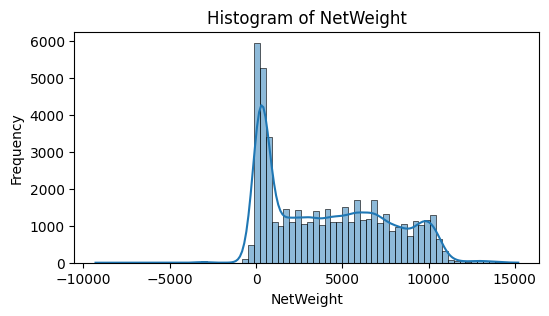

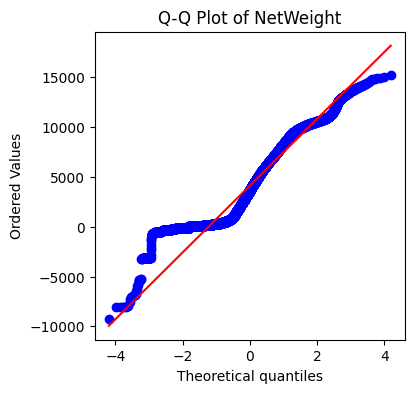

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Statistic for NetWeight: 0.9204572439193726, p-value: 0.0
NetWeight does not appear to be normally distributed (reject null hypothesis)


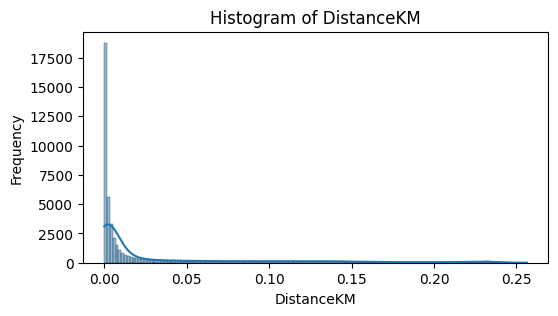

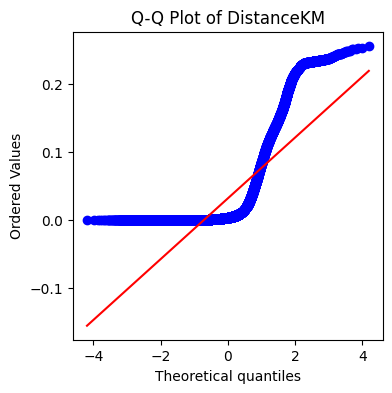

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Statistic for DistanceKM: 0.6264669895172119, p-value: 0.0
DistanceKM does not appear to be normally distributed (reject null hypothesis)


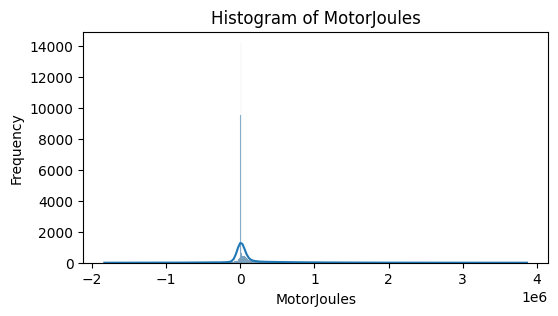

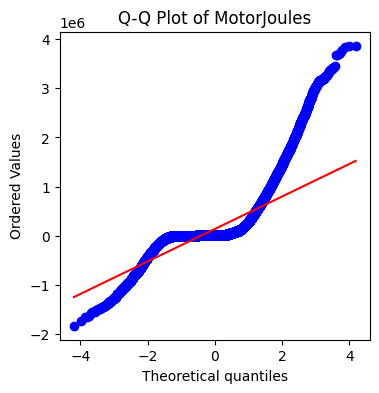

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Statistic for MotorJoules: 0.6193637251853943, p-value: 0.0
MotorJoules does not appear to be normally distributed (reject null hypothesis)


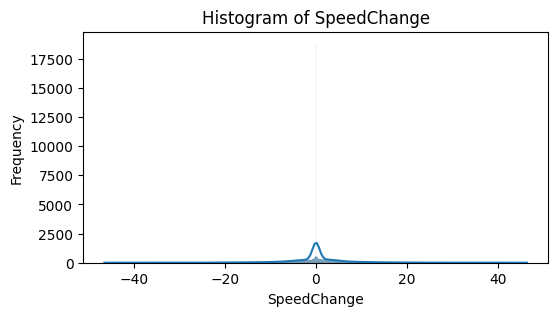

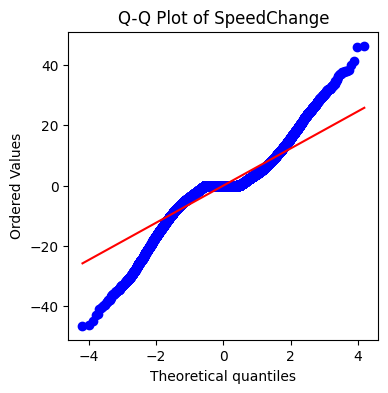

Shapiro-Wilk Statistic for SpeedChange: 0.8373422026634216, p-value: 0.0
SpeedChange does not appear to be normally distributed (reject null hypothesis)


/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# List of columns to check
columns_to_check = ["NetWeight", "DistanceKM", "MotorJoules", "SpeedChange"]

# Function to check normality
def check_normality(data, column_name, sample_size=50000):
    # Randomly sample data for faster processing
    sample_data = np.random.choice(data, size=min(sample_size, len(data)), replace=False)
    
    # Histogram
    plt.figure(figsize=(6,3))
    sns.histplot(sample_data, kde=True)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

    # Q-Q plot
    plt.figure(figsize=(4, 4))
    stats.probplot(sample_data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column_name}')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Ordered Values')
    plt.show()

    # Shapiro-Wilk test
    stat, p_value = stats.shapiro(sample_data)
    print(f"Shapiro-Wilk Statistic for {column_name}: {stat}, p-value: {p_value}")
    if p_value > 0.05:
        print(f"{column_name} appears to be normally distributed (fail to reject null hypothesis)")
    else:
        print(f"{column_name} does not appear to be normally distributed (reject null hypothesis)")

# Loop through columns and check normality
for column in columns_to_check:
    check_normality(df[column], column)


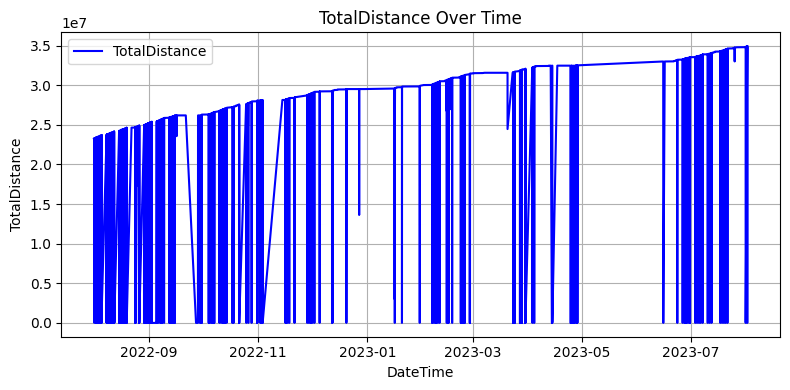

In [ ]:


# Check if 'TotalDistance' column exists in the DataFrame, if the sum is aggregated over time, drop the feature (then it doesnt say anything about the current energy use)
if 'TotalDistance' in df.columns:
    # Plot the 'TotalDistance' column
    plt.figure(figsize=(8, 4))
    plt.plot(df['datetime'], df['TotalDistance'], color='blue', label='TotalDistance')
    plt.xlabel('DateTime')
    plt.ylabel('TotalDistance')
    plt.title('TotalDistance Over Time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("The column 'TotalDistance' is not present in the DataFrame.")


In [ ]:
raise SystemExit("Stopping execution of  DISTRUIBUTIONS.")

SystemExit: Stopping execution of  DISTRUIBUTIONS.

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


PLOT BASIC FEATURES 

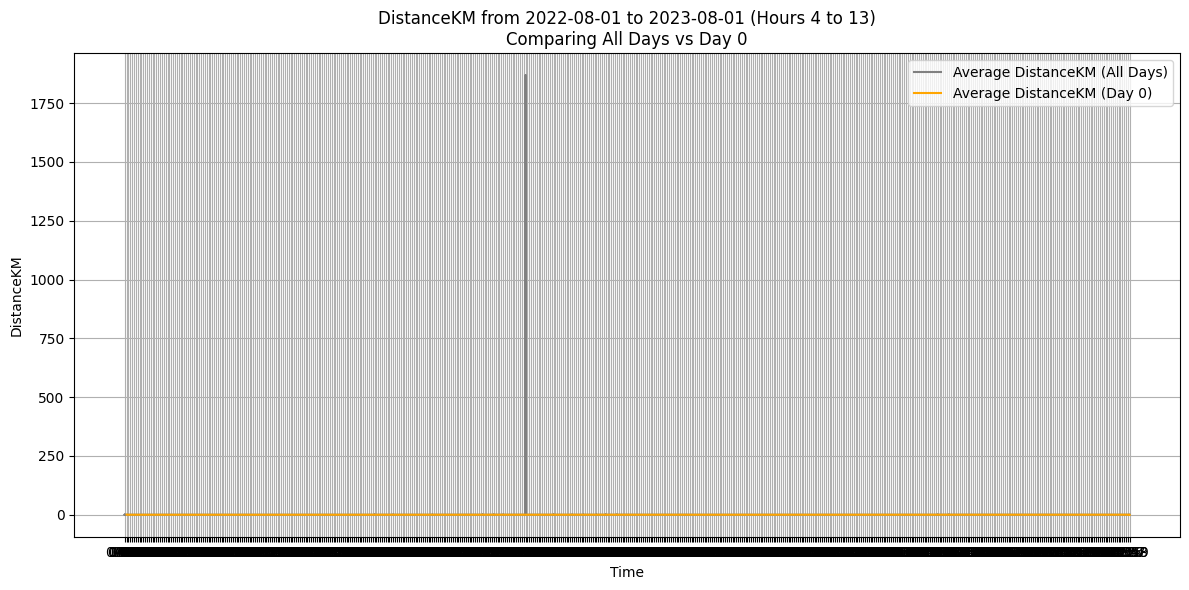

Number of rows before filtering: 309918
Number of rows after filtering by date and day of week: 62514
Number of rows after time filtering: 62514


In [ ]:
#Compare a patterns for a single -day-of-week compared to average over week
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame already loaded with appropriate data
# and 'datetime' is the column containing the date and time information

# Make a copy of the original DataFrame to avoid altering it
df_copy = df.copy()

# Check if 'datetime' column is present
if 'datetime' not in df_copy.columns and df_copy.index.name != 'datetime':
    raise KeyError("The 'datetime' column is not found in the DataFrame or set as the index.")

# Convert 'datetime' column to datetime type if it's not already, only if 'datetime' is a column
if 'datetime' in df_copy.columns:
    df_copy['datetime'] = pd.to_datetime(df_copy['datetime'], errors='coerce')
    # Drop rows where the conversion to datetime failed (NaT)
    df_copy = df_copy.dropna(subset=['datetime'])

# If 'datetime' is not the index, set it as the index
if df_copy.index.name != 'datetime':
    df_copy.set_index('datetime', inplace=True)

# Ensure the index is of datetime type
df_copy.index = pd.to_datetime(df_copy.index, errors='coerce')

# Sort the dataframe by datetime to ensure proper order
df_copy = df_copy.sort_index()

# Define a function to filter data by date range and day of week
def filter_data(df, start_date, end_date, day_of_week=None):
    # Filter by date range
    date_filtered_df = df.loc[start_date:end_date]
    
    # Filter by day of the week (0=Monday, ..., 6=Sunday) if specified
    if day_of_week is not None:
        date_filtered_df = date_filtered_df[date_filtered_df.index.weekday == day_of_week]
    
    return date_filtered_df

# Define your start date, end date, and day of the week
start_date = '2022-08-01'  # Change as needed
end_date = '2023-08-01'    # Change as needed
day_of_week = 0            # Monday (Change as needed, use None if no specific day filter is needed)

# Apply the filters
filtered_df = filter_data(df_copy, start_date, end_date, day_of_week)

# Filter for all days in the specified date range (without considering day of the week)
all_days_df = filter_data(df_copy, start_date, end_date)

# Further filter the data to include only the specified time range (4:00 to 13:59)
limited_filtered_all_days = all_days_df.between_time('04:00', '13:59')
limited_filtered_day_of_week = filtered_df.between_time('04:00', '13:59')

# Calculate the average DistanceKM for each time slot across all days
average_distance_all_days = limited_filtered_all_days.groupby(limited_filtered_all_days.index.time)['DistanceKM'].mean()

# Calculate the average DistanceKM for each time slot for the specified day of the week
average_distance_day_of_week = limited_filtered_day_of_week.groupby(limited_filtered_day_of_week.index.time)['DistanceKM'].mean()

# Convert time objects to strings for plotting
average_distance_all_days.index = [time.strftime('%H:%M') for time in average_distance_all_days.index]
average_distance_day_of_week.index = [time.strftime('%H:%M') for time in average_distance_day_of_week.index]

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot average DistanceKM for all days
plt.plot(average_distance_all_days.index, average_distance_all_days, color='grey', label='Average DistanceKM (All Days)')

# Plot average DistanceKM for the specified day of the week
plt.plot(average_distance_day_of_week.index, average_distance_day_of_week, color='orange', label=f'Average DistanceKM (Day {day_of_week})')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('DistanceKM')
plt.title(f'DistanceKM from {start_date} to {end_date} (Hours 4 to 13)\nComparing All Days vs Day {day_of_week}')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

# Print the number of rows before and after filtering
print(f"Number of rows before filtering: {df.shape[0]}")
print(f"Number of rows after filtering by date and day of week: {filtered_df.shape[0]}")
print(f"Number of rows after time filtering: {limited_filtered_day_of_week.shape[0]}")



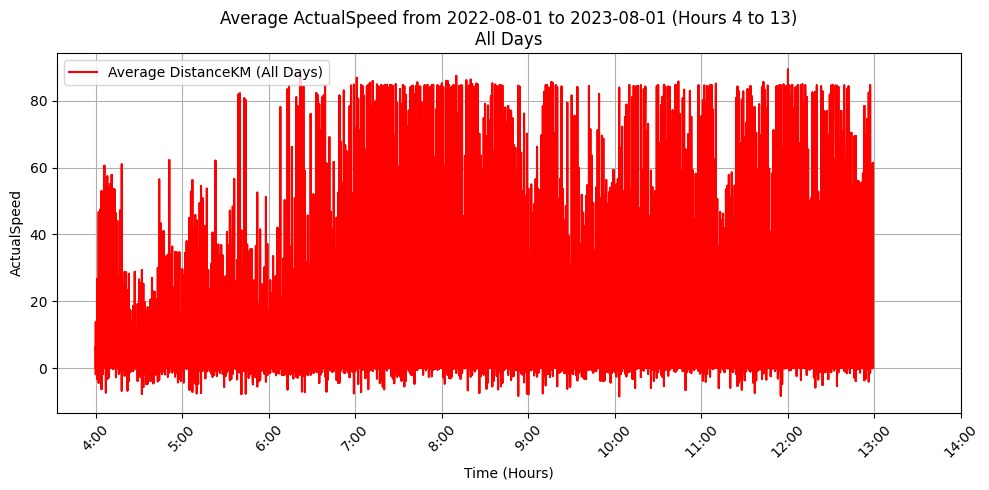

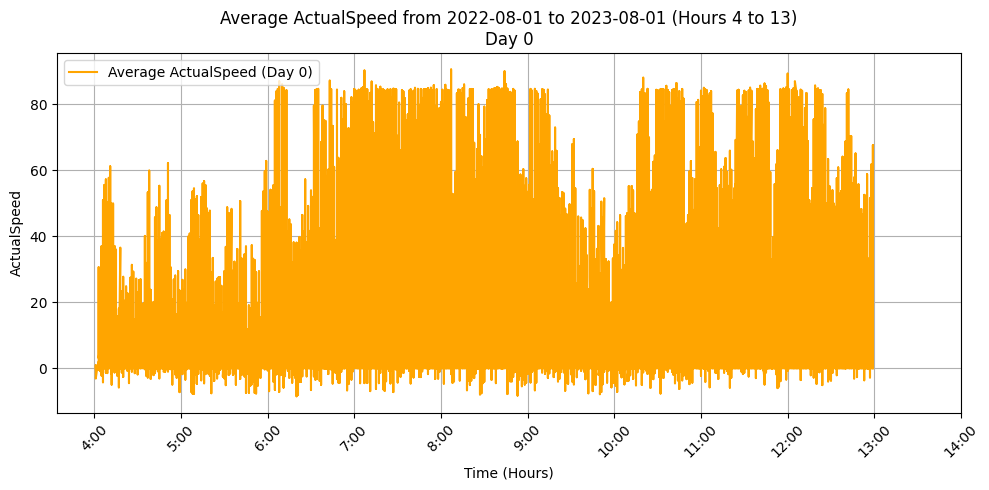

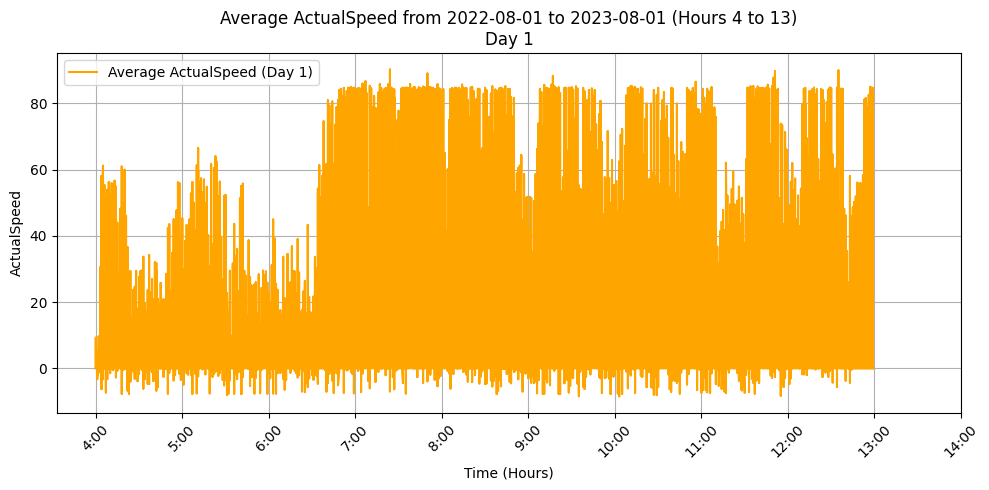

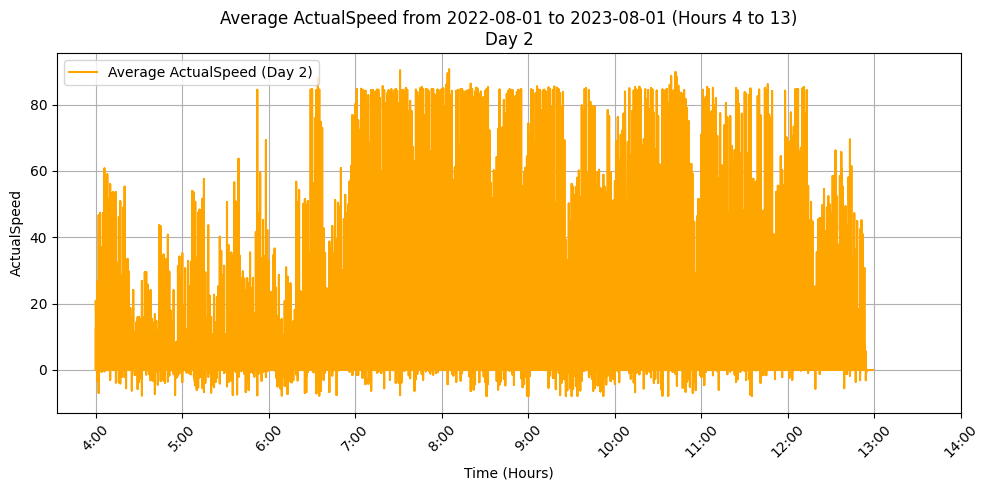

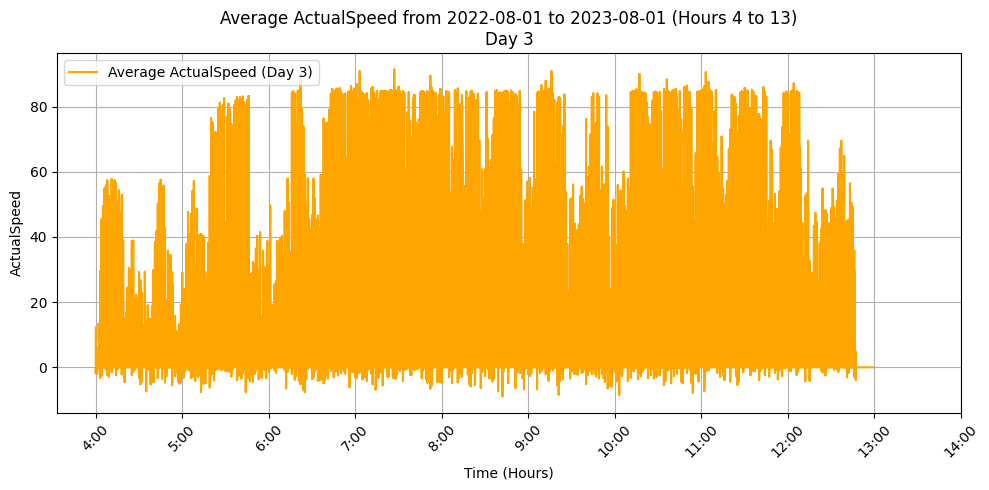

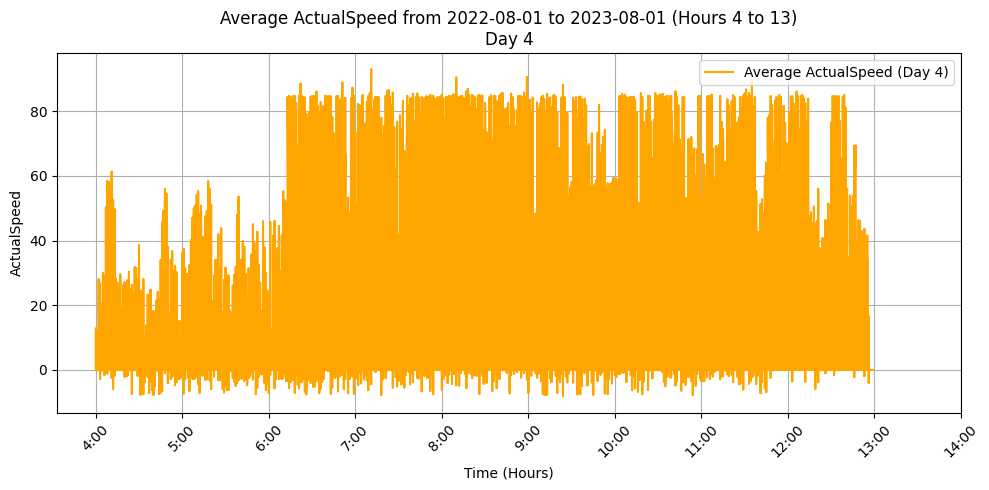

Number of rows before filtering: 309918
Number of rows after filtering by date range: 0


In [ ]:
#Explore patterns for ActualSpeed on the same day-of-week

# Assuming 'df' is your DataFrame already loaded with appropriate data
# and 'datetime' is the column containing the date and time information

# Make a copy of the original DataFrame to avoid altering it
df_copy = df.copy()

# Check if 'datetime' column is present
if 'datetime' not in df_copy.columns and df_copy.index.name != 'datetime':
    raise KeyError("The 'datetime' column is not found in the DataFrame or set as the index.")

# Convert 'datetime' column to datetime type if it's not already, only if 'datetime' is a column
if 'datetime' in df_copy.columns:
    df_copy['datetime'] = pd.to_datetime(df_copy['datetime'], errors='coerce')
    # Drop rows where the conversion to datetime failed (NaT)
    df_copy = df_copy.dropna(subset=['datetime'])

# If 'datetime' is not the index, set it as the index
if df_copy.index.name != 'datetime':
    df_copy.set_index('datetime', inplace=True)

# Ensure the index is of datetime type
df_copy.index = pd.to_datetime(df_copy.index, errors='coerce')

# Sort the dataframe by datetime to ensure proper order
df_copy = df_copy.sort_index()

# Define a function to filter data by date range and day of week
def filter_data(df, start_date, end_date, day_of_week=None):
    # Filter by date range
    date_filtered_df = df.loc[start_date:end_date]
    
    # Filter by day of the week (0=Monday, ..., 6=Sunday) if specified
    if day_of_week is not None:
        date_filtered_df = date_filtered_df[date_filtered_df.index.weekday == day_of_week]
    
    return date_filtered_df

# Define your start date, end date, and optionally a day of the week for all days
start_date = '2022-08-01'  # Change as needed
end_date = '2023-08-01'    # Change as needed
day_of_week = None         # Set to None to plot for all days, or specify a day (0=Monday, ..., 6=Sunday)

# Set x-axis ticks for hours from 4 to 14
x_ticks = [f'{hour}:00' for hour in range(4, 15)]

# Function to convert datetime.time to hours for plotting
def time_to_hour(t):
    return t.hour + t.minute / 60.0

# If day_of_week is None, plot for all days and for each weekday separately
if day_of_week is None:
    # Plot average for all days in the date range
    all_days_df = filter_data(df_copy, start_date, end_date)
    limited_filtered_all_days = all_days_df.between_time('04:00', '13:59')
    average_distance_all_days = limited_filtered_all_days.groupby(limited_filtered_all_days.index.time)['ActualSpeed'].mean()

    # Convert time index to hours for plotting
    average_distance_all_days.index = [time_to_hour(t) for t in average_distance_all_days.index]

    # Plotting the results for all days
    plt.figure(figsize=(10, 5))
    plt.plot(average_distance_all_days.index, average_distance_all_days, color='red', label='Average DistanceKM (All Days)')
    plt.xlabel('Time (Hours)')
    plt.ylabel('ActualSpeed')
    plt.title(f'Average ActualSpeed from {start_date} to {end_date} (Hours 4 to 13)\nAll Days')
    plt.legend()
    plt.grid(True)
    
    # Set x-axis ticks to display only full hours from 4 to 14
    plt.xticks(ticks=range(4, 15), labels=x_ticks, rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot for each weekday separately (excluding Saturday (5) and Sunday (6))
    for day in range(5):  # Only 0 to 4 for weekdays, excluding 5 (Saturday) and 6 (Sunday)
        # Filter for the specified day of the week
        day_df = filter_data(df_copy, start_date, end_date, day)
        limited_filtered_day_of_week = day_df.between_time('04:00', '13:59')
        average_distance_day_of_week = limited_filtered_day_of_week.groupby(limited_filtered_day_of_week.index.time)['ActualSpeed'].mean()

        # Convert time index to hours for plotting
        average_distance_day_of_week.index = [time_to_hour(t) for t in average_distance_day_of_week.index]

        # Plotting the results for the specified day of the week
        plt.figure(figsize=(10, 5))
        plt.plot(average_distance_day_of_week.index, average_distance_day_of_week, color='orange', label=f'Average ActualSpeed (Day {day})')
        plt.xlabel('Time (Hours)')
        plt.ylabel('ActualSpeed')
        plt.title(f'Average ActualSpeed from {start_date} to {end_date} (Hours 4 to 13)\nDay {day}')
        plt.legend()
        plt.grid(True)
        
        # Set x-axis ticks to display only full hours from 4 to 14
        plt.xticks(ticks=range(4, 15), labels=x_ticks, rotation=45)
        plt.tight_layout()
        plt.show()
else:
    # Plot only for the specified day of the week
    if day_of_week in [0, 1, 2, 3, 4]:  # Only process weekdays
        day_df = filter_data(df_copy, start_date, end_date, day_of_week)
        limited_filtered_day_of_week = day_df.between_time('04:00', '13:59')
        average_distance_day_of_week = limited_filtered_day_of_week.groupby(limited_filtered_day_of_week.index.time)['ActualSpeed'].mean()

        # Convert time index to hours for plotting
        average_distance_day_of_week.index = [time_to_hour(t) for t in average_distance_day_of_week.index]

        # Plotting the results for the specified day of the week
        plt.figure(figsize=(10, 5))
        plt.plot(average_distance_day_of_week.index, average_distance_day_of_week, color='orange', label=f'Average AtualSpeed (Day {day_of_week})')
        plt.xlabel('Time (Hours)')
        plt.ylabel('ActualSpeed')
        plt.title(f'Average ActualSpeed from {start_date} to {end_date} (Hours 4 to 13)\nDay {day_of_week}')
        plt.legend()
        plt.grid(True)
        
        # Set x-axis ticks to display only full hours from 4 to 14
        plt.xticks(ticks=range(4, 15), labels=x_ticks, rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping plotting for day_of_week = {day_of_week}, as it is a weekend.")

# Print the number of rows before and after filtering
print(f"Number of rows before filtering: {df.shape[0]}")
filtered_rows = filter_data(df, start_date, end_date).shape[0]
print(f"Number of rows after filtering by date range: {filtered_rows}")


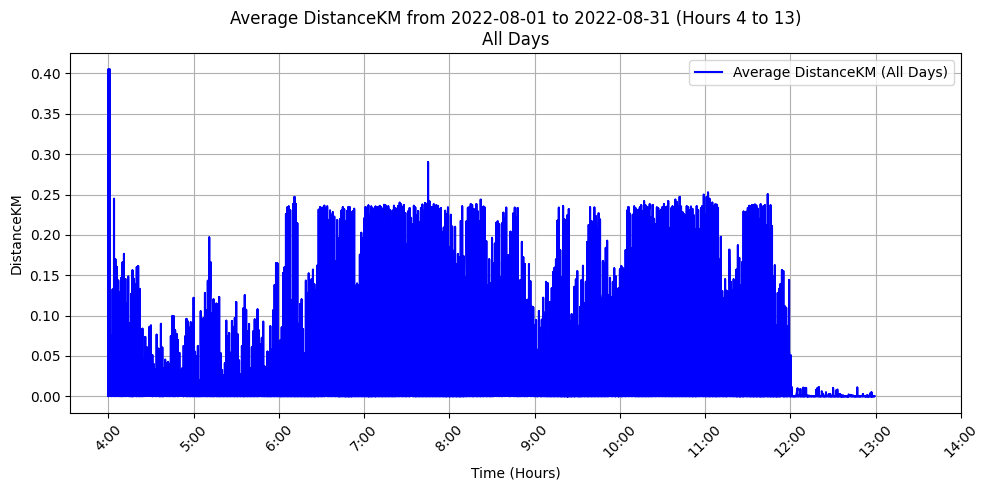

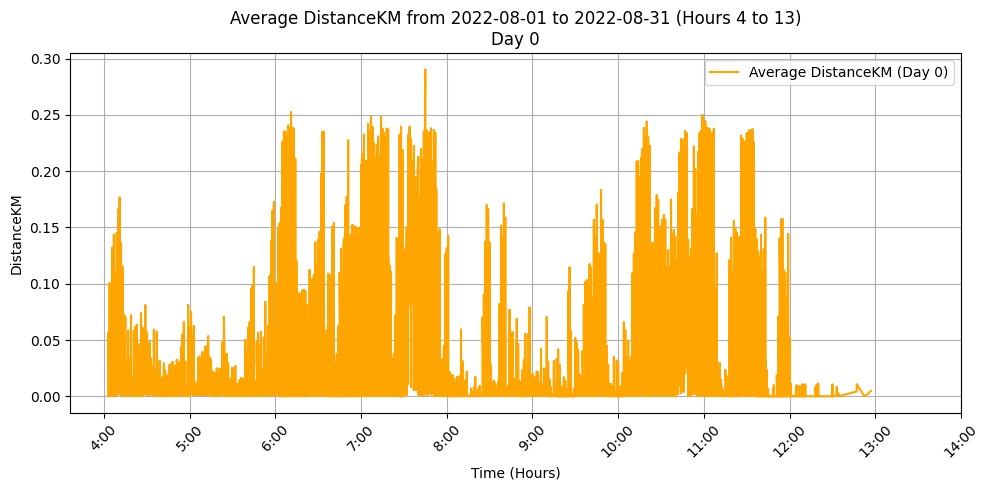

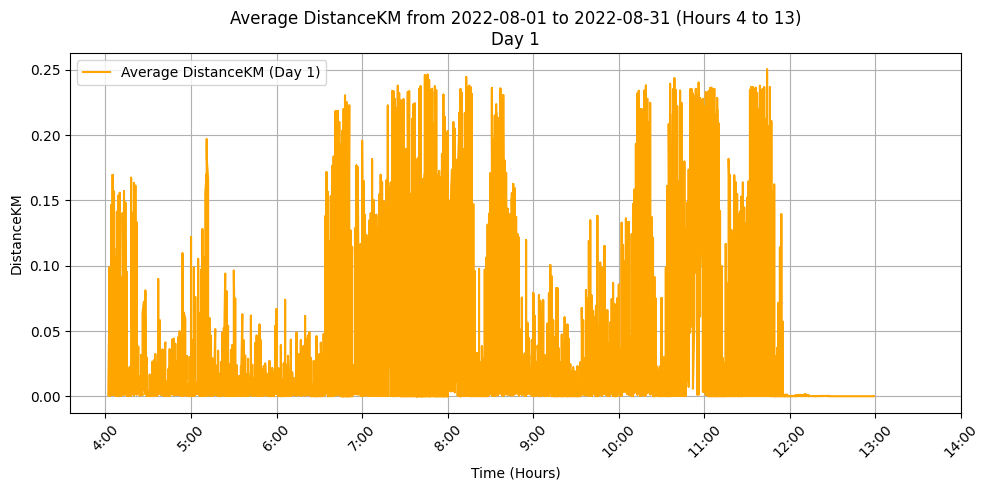

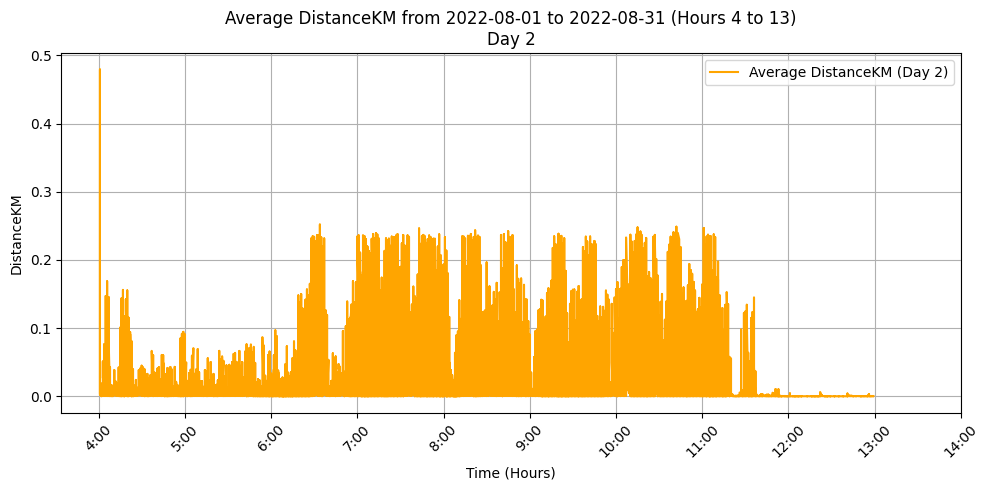

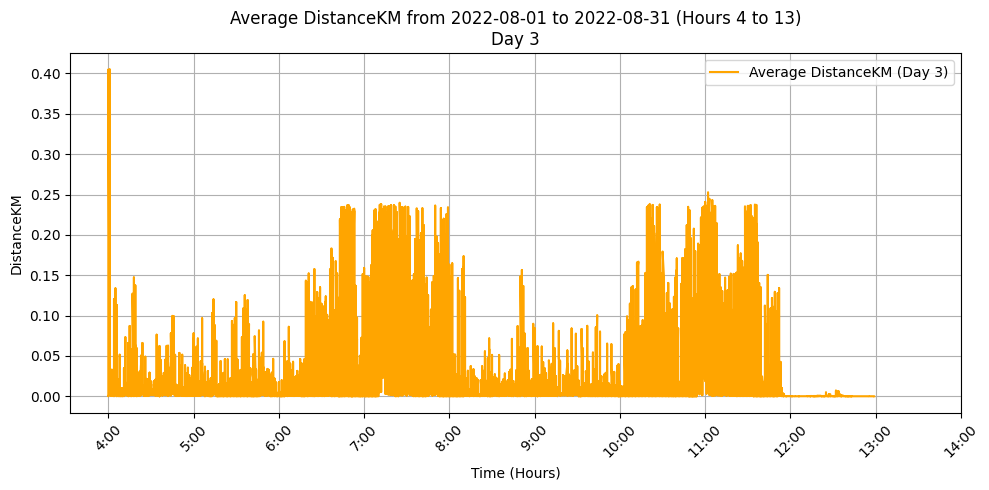

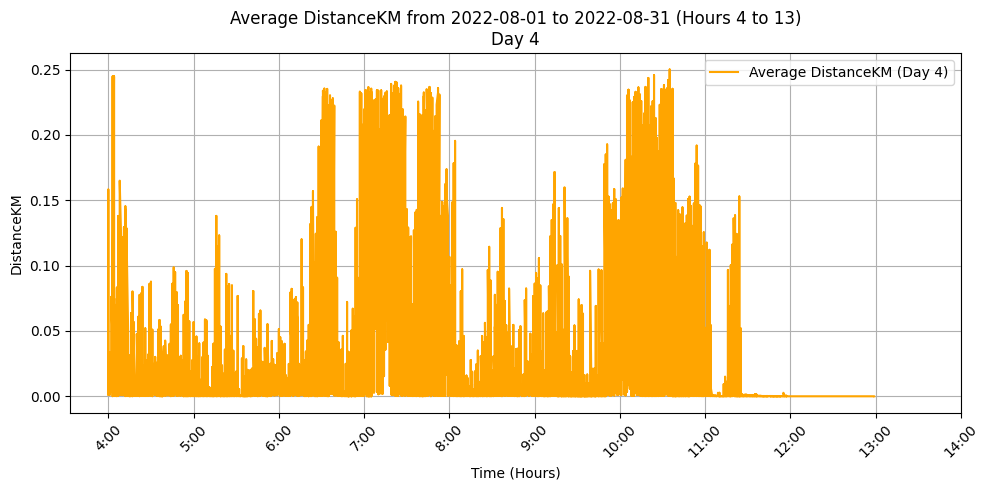

Number of rows before filtering: 309918
Number of rows after filtering by date range: 0


In [ ]:
#Explore patterns for DistanceKM on the same day-of-week

# Assuming 'df' is your DataFrame already loaded with appropriate data
# and 'datetime' is the column containing the date and time information

# Make a copy of the original DataFrame to avoid altering it
df_copy = df.copy()

# Check if 'datetime' column is present
if 'datetime' not in df_copy.columns and df_copy.index.name != 'datetime':
    raise KeyError("The 'datetime' column is not found in the DataFrame or set as the index.")

# Convert 'datetime' column to datetime type if it's not already, only if 'datetime' is a column
if 'datetime' in df_copy.columns:
    df_copy['datetime'] = pd.to_datetime(df_copy['datetime'], errors='coerce')
    # Drop rows where the conversion to datetime failed (NaT)
    df_copy = df_copy.dropna(subset=['datetime'])

# If 'datetime' is not the index, set it as the index
if df_copy.index.name != 'datetime':
    df_copy.set_index('datetime', inplace=True)

# Ensure the index is of datetime type
df_copy.index = pd.to_datetime(df_copy.index, errors='coerce')

# Sort the dataframe by datetime to ensure proper order
df_copy = df_copy.sort_index()

# Define a function to filter data by date range and day of week
def filter_data(df, start_date, end_date, day_of_week=None):
    # Filter by date range
    date_filtered_df = df.loc[start_date:end_date]
    
    # Filter by day of the week (0=Monday, ..., 6=Sunday) if specified
    if day_of_week is not None:
        date_filtered_df = date_filtered_df[date_filtered_df.index.weekday == day_of_week]
    
    return date_filtered_df

# Define your start date, end date, and optionally a day of the week for all days
start_date = '2022-08-01'  # Change as needed
end_date = '2022-08-31'    # Change as needed
day_of_week = None         # Set to None to plot for all days, or specify a day (0=Monday, ..., 6=Sunday)

# Set x-axis ticks for hours from 4 to 14
x_ticks = [f'{hour}:00' for hour in range(4, 15)]

# Function to convert datetime.time to hours for plotting
def time_to_hour(t):
    return t.hour + t.minute / 60.0

# If day_of_week is None, plot for all days and for each weekday separately
if day_of_week is None:
    # Plot average for all days in the date range
    all_days_df = filter_data(df_copy, start_date, end_date)
    limited_filtered_all_days = all_days_df.between_time('04:00', '13:59')
    average_distance_all_days = limited_filtered_all_days.groupby(limited_filtered_all_days.index.time)['DistanceKM'].mean()

    # Convert time index to hours for plotting
    average_distance_all_days.index = [time_to_hour(t) for t in average_distance_all_days.index]

    # Plotting the results for all days
    plt.figure(figsize=(10, 5))
    plt.plot(average_distance_all_days.index, average_distance_all_days, color='blue', label='Average DistanceKM (All Days)')
    plt.xlabel('Time (Hours)')
    plt.ylabel('DistanceKM')
    plt.title(f'Average DistanceKM from {start_date} to {end_date} (Hours 4 to 13)\nAll Days')
    plt.legend()
    plt.grid(True)
    
    # Set x-axis ticks to display only full hours from 4 to 14
    plt.xticks(ticks=range(4, 15), labels=x_ticks, rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot for each weekday separately (excluding Saturday (5) and Sunday (6))
    for day in range(5):  # Only 0 to 4 for weekdays, excluding 5 (Saturday) and 6 (Sunday)
        # Filter for the specified day of the week
        day_df = filter_data(df_copy, start_date, end_date, day)
        limited_filtered_day_of_week = day_df.between_time('04:00', '13:59')
        average_distance_day_of_week = limited_filtered_day_of_week.groupby(limited_filtered_day_of_week.index.time)['DistanceKM'].mean()

        # Convert time index to hours for plotting
        average_distance_day_of_week.index = [time_to_hour(t) for t in average_distance_day_of_week.index]

        # Plotting the results for the specified day of the week
        plt.figure(figsize=(10, 5))
        plt.plot(average_distance_day_of_week.index, average_distance_day_of_week, color='orange', label=f'Average DistanceKM (Day {day})')
        plt.xlabel('Time (Hours)')
        plt.ylabel('DistanceKM')
        plt.title(f'Average DistanceKM from {start_date} to {end_date} (Hours 4 to 13)\nDay {day}')
        plt.legend()
        plt.grid(True)
        
        # Set x-axis ticks to display only full hours from 4 to 14
        plt.xticks(ticks=range(4, 15), labels=x_ticks, rotation=45)
        plt.tight_layout()
        plt.show()
else:
    # Plot only for the specified day of the week
    if day_of_week in [0, 1, 2, 3, 4]:  # Only process weekdays
        day_df = filter_data(df_copy, start_date, end_date, day_of_week)
        limited_filtered_day_of_week = day_df.between_time('04:00', '13:59')
        average_distance_day_of_week = limited_filtered_day_of_week.groupby(limited_filtered_day_of_week.index.time)['DistanceKM'].mean()

        # Convert time index to hours for plotting
        average_distance_day_of_week.index = [time_to_hour(t) for t in average_distance_day_of_week.index]

        # Plotting the results for the specified day of the week
        plt.figure(figsize=(10, 5))
        plt.plot(average_distance_day_of_week.index, average_distance_day_of_week, color='orange', label=f'Average DistanceKM (Day {day_of_week})')
        plt.xlabel('Time (Hours)')
        plt.ylabel('DistanceKM')
        plt.title(f'Average DistanceKM from {start_date} to {end_date} (Hours 4 to 13)\nDay {day_of_week}')
        plt.legend()
        plt.grid(True)
        
        # Set x-axis ticks to display only full hours from 4 to 14
        plt.xticks(ticks=range(4, 15), labels=x_ticks, rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping plotting for day_of_week = {day_of_week}, as it is a weekend.")

# Print the number of rows before and after filtering
print(f"Number of rows before filtering: {df.shape[0]}")
filtered_rows = filter_data(df, start_date, end_date).shape[0]
print(f"Number of rows after filtering by date range: {filtered_rows}")


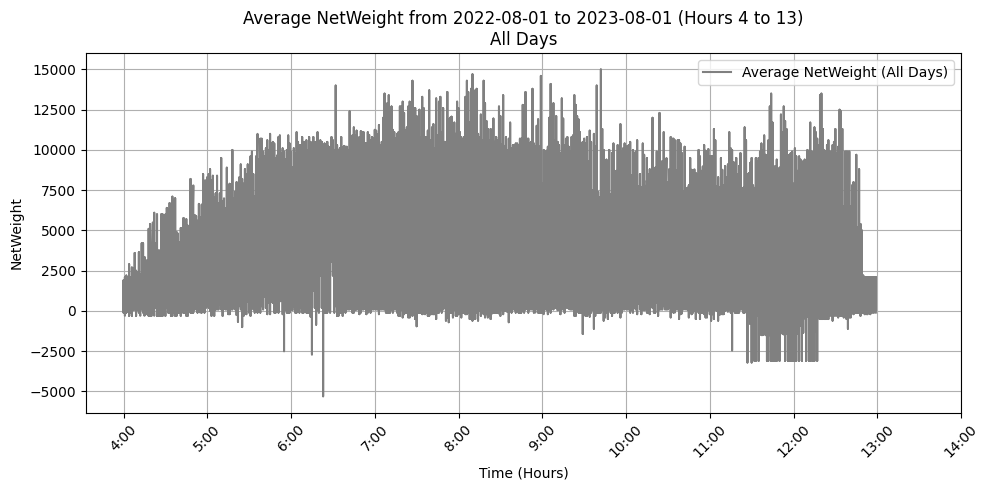

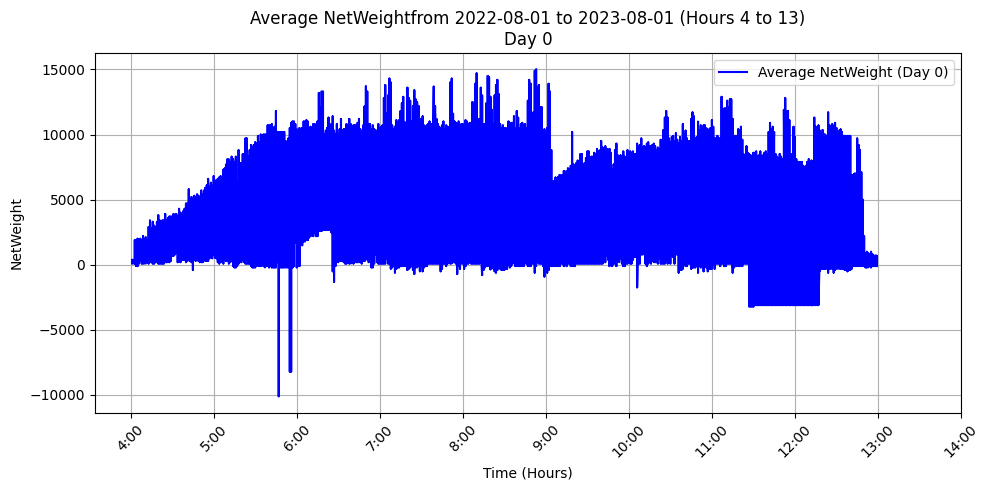

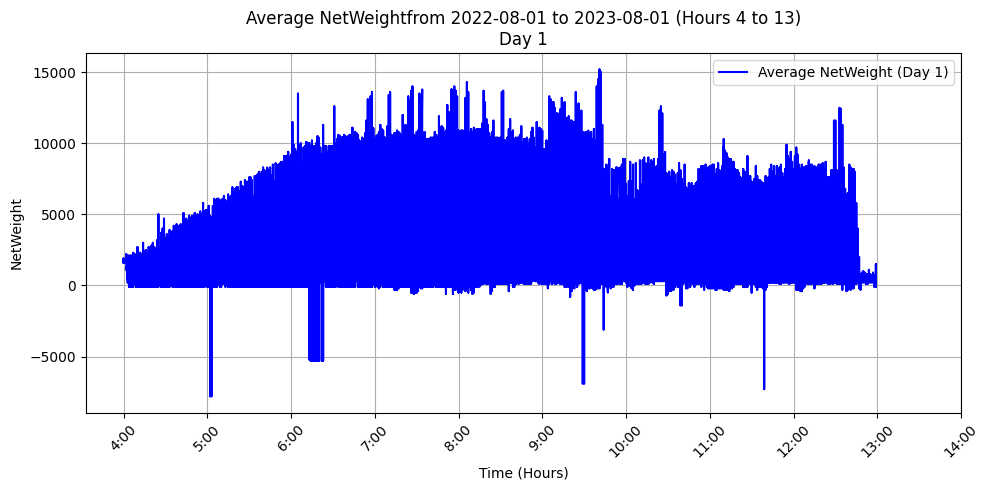

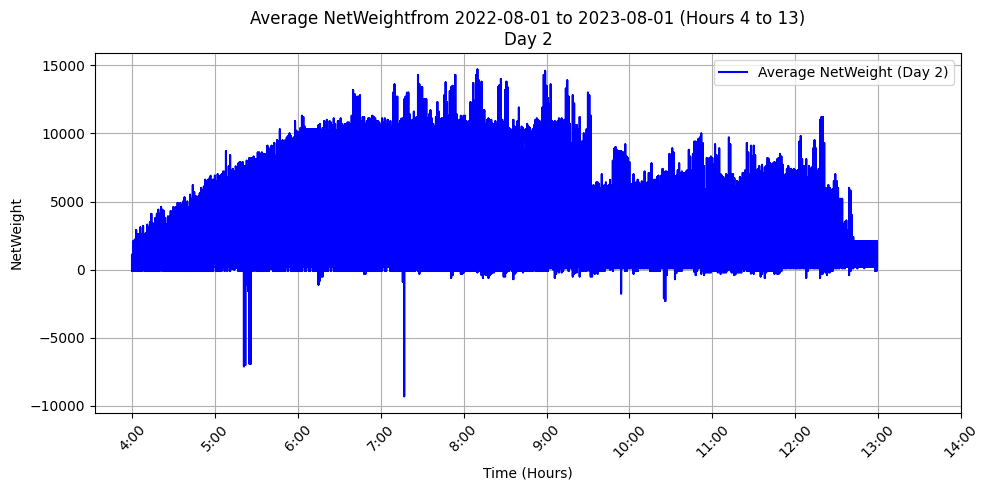

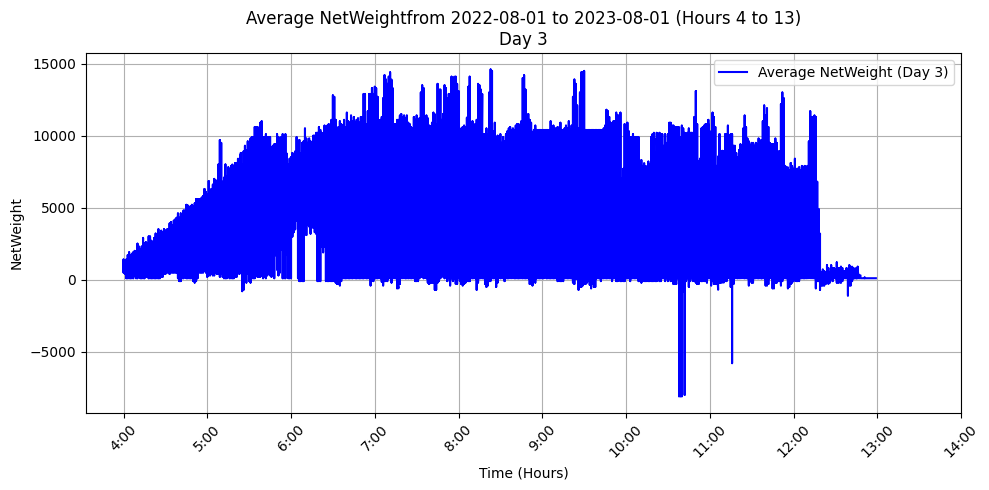

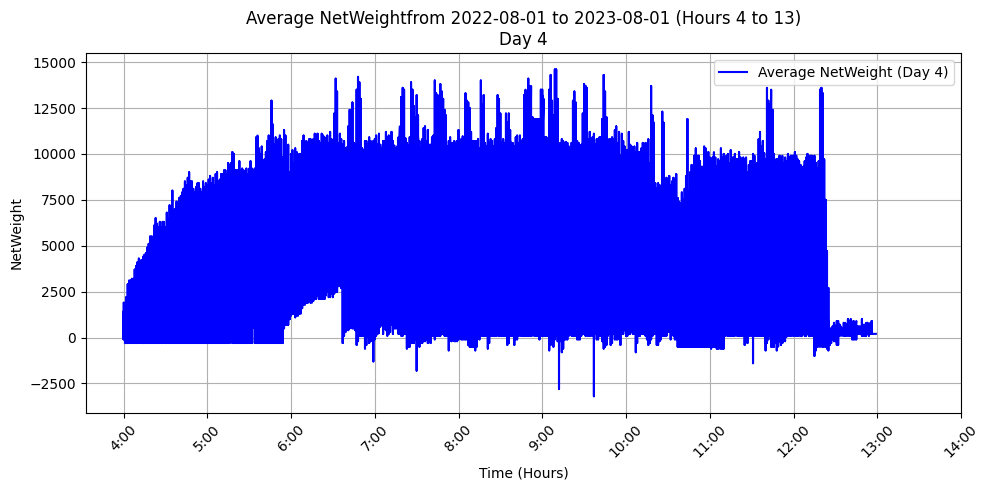

Number of rows before filtering: 309918
Number of rows after filtering by date range: 0


In [ ]:
#Explore patterns for NetWeight on the same day-of-week

# Assuming 'df' is your DataFrame already loaded with appropriate data
# and 'datetime' is the column containing the date and time information

# Make a copy of the original DataFrame to avoid altering it
df_copy = df.copy()

# Check if 'datetime' column is present
if 'datetime' not in df_copy.columns and df_copy.index.name != 'datetime':
    raise KeyError("The 'datetime' column is not found in the DataFrame or set as the index.")

# Convert 'datetime' column to datetime type if it's not already, only if 'datetime' is a column
if 'datetime' in df_copy.columns:
    df_copy['datetime'] = pd.to_datetime(df_copy['datetime'], errors='coerce')
    # Drop rows where the conversion to datetime failed (NaT)
    df_copy = df_copy.dropna(subset=['datetime'])

# If 'datetime' is not the index, set it as the index
if df_copy.index.name != 'datetime':
    df_copy.set_index('datetime', inplace=True)

# Ensure the index is of datetime type
df_copy.index = pd.to_datetime(df_copy.index, errors='coerce')

# Sort the dataframe by datetime to ensure proper order
df_copy = df_copy.sort_index()

# Define a function to filter data by date range and day of week
def filter_data(df, start_date, end_date, day_of_week=None):
    # Filter by date range
    date_filtered_df = df.loc[start_date:end_date]
    
    # Filter by day of the week (0=Monday, ..., 6=Sunday) if specified
    if day_of_week is not None:
        date_filtered_df = date_filtered_df[date_filtered_df.index.weekday == day_of_week]
    
    return date_filtered_df

# Define your start date, end date, and optionally a day of the week for all days
start_date = '2022-08-01'  # Change as needed
end_date = '2023-08-01'    # Change as needed
day_of_week = None         # Set to None to plot for all days, or specify a day (0=Monday, ..., 6=Sunday)

# Set x-axis ticks for hours from 4 to 14
x_ticks = [f'{hour}:00' for hour in range(4, 15)]

# Function to convert datetime.time to hours for plotting
def time_to_hour(t):
    return t.hour + t.minute / 60.0

# If day_of_week is None, plot for all days and for each weekday separately
if day_of_week is None:
    # Plot average for all days in the date range
    all_days_df = filter_data(df_copy, start_date, end_date)
    limited_filtered_all_days = all_days_df.between_time('04:00', '13:59')
    average_distance_all_days = limited_filtered_all_days.groupby(limited_filtered_all_days.index.time)['NetWeight'].mean()

    # Convert time index to hours for plotting
    average_distance_all_days.index = [time_to_hour(t) for t in average_distance_all_days.index]

    # Plotting the results for all days
    plt.figure(figsize=(10, 5))
    plt.plot(average_distance_all_days.index, average_distance_all_days, color='grey', label='Average NetWeight (All Days)')
    plt.xlabel('Time (Hours)')
    plt.ylabel('NetWeight')
    plt.title(f'Average NetWeight from {start_date} to {end_date} (Hours 4 to 13)\nAll Days')
    plt.legend()
    plt.grid(True)
    
    # Set x-axis ticks to display only full hours from 4 to 14
    plt.xticks(ticks=range(4, 15), labels=x_ticks, rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot for each weekday separately (excluding Saturday (5) and Sunday (6))
    for day in range(5):  # Only 0 to 4 for weekdays, excluding 5 (Saturday) and 6 (Sunday)
        # Filter for the specified day of the week
        day_df = filter_data(df_copy, start_date, end_date, day)
        limited_filtered_day_of_week = day_df.between_time('04:00', '13:59')
        average_distance_day_of_week = limited_filtered_day_of_week.groupby(limited_filtered_day_of_week.index.time)['NetWeight'].mean()

        # Convert time index to hours for plotting
        average_distance_day_of_week.index = [time_to_hour(t) for t in average_distance_day_of_week.index]

        # Plotting the results for the specified day of the week
        plt.figure(figsize=(10, 5))
        plt.plot(average_distance_day_of_week.index, average_distance_day_of_week, color='blue', label=f'Average NetWeight (Day {day})')
        plt.xlabel('Time (Hours)')
        plt.ylabel('NetWeight')
        plt.title(f'Average NetWeightfrom {start_date} to {end_date} (Hours 4 to 13)\nDay {day}')
        plt.legend()
        plt.grid(True)
        
        # Set x-axis ticks to display only full hours from 4 to 14
        plt.xticks(ticks=range(4, 15), labels=x_ticks, rotation=45)
        plt.tight_layout()
        plt.show()
else:
    # Plot only for the specified day of the week
    if day_of_week in [0, 1, 2, 3, 4]:  # Only process weekdays
        day_df = filter_data(df_copy, start_date, end_date, day_of_week)
        limited_filtered_day_of_week = day_df.between_time('04:00', '13:59')
        average_distance_day_of_week = limited_filtered_day_of_week.groupby(limited_filtered_day_of_week.index.time)['NetWeight'].mean()

        # Convert time index to hours for plotting
        average_distance_day_of_week.index = [time_to_hour(t) for t in average_distance_day_of_week.index]

        # Plotting the results for the specified day of the week
        plt.figure(figsize=(10, 5))
        plt.plot(average_distance_day_of_week.index, average_distance_day_of_week, color='orange', label=f'Average NetWeight (Day {day_of_week})')
        plt.xlabel('Time (Hours)')
        plt.ylabel('NetWeight')
        plt.title(f'Average NetWeight from {start_date} to {end_date} (Hours 4 to 13)\nDay {day_of_week}')
        plt.legend()
        plt.grid(True)
        
        # Set x-axis ticks to display only full hours from 4 to 14
        plt.xticks(ticks=range(4, 15), labels=x_ticks, rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping plotting for day_of_week = {day_of_week}, as it is a weekend.")

# Print the number of rows before and after filtering
print(f"Number of rows before filtering: {df.shape[0]}")
filtered_rows = filter_data(df, start_date, end_date).shape[0]
print(f"Number of rows after filtering by date range: {filtered_rows}")


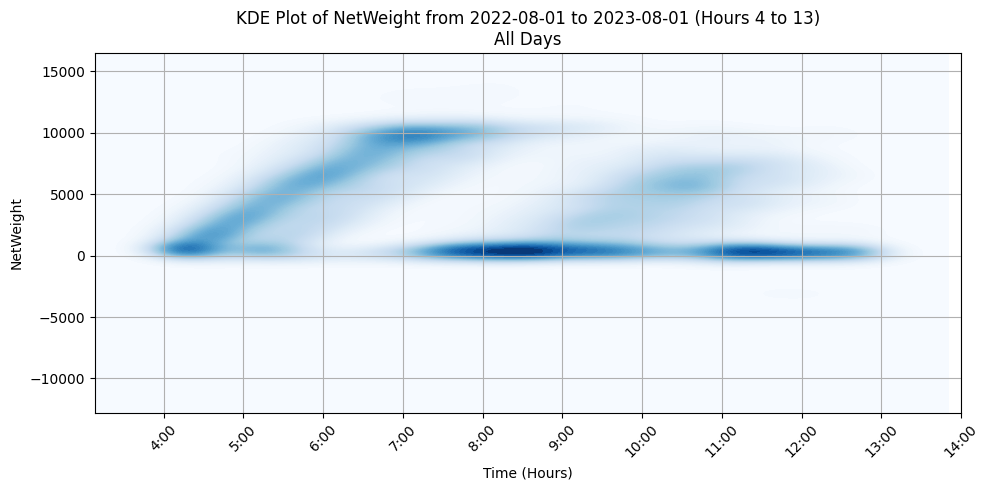

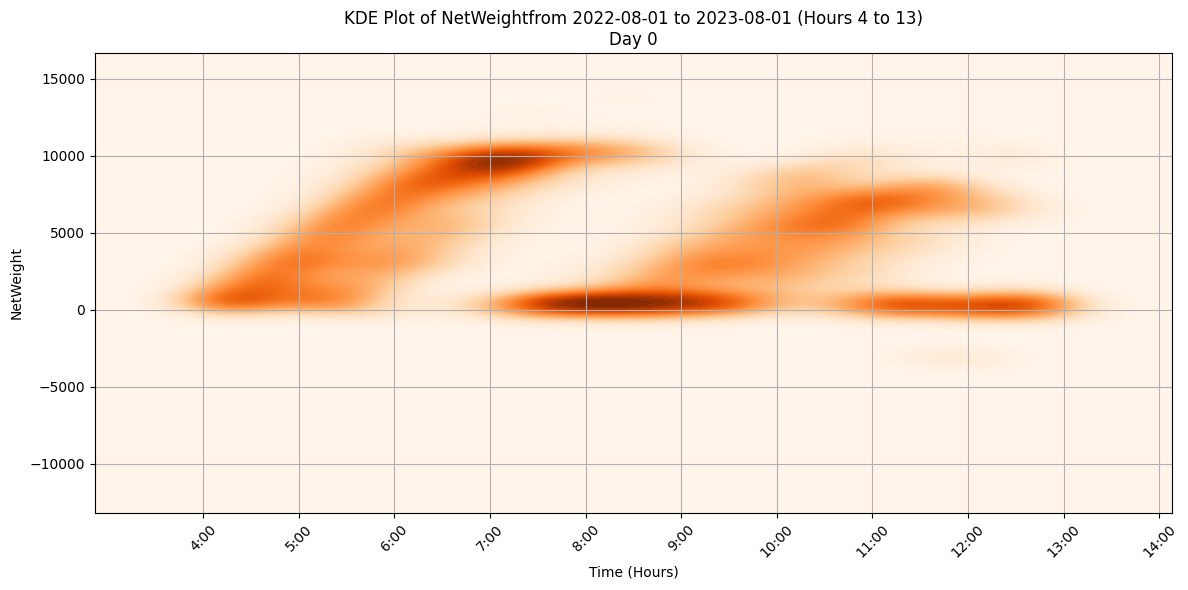

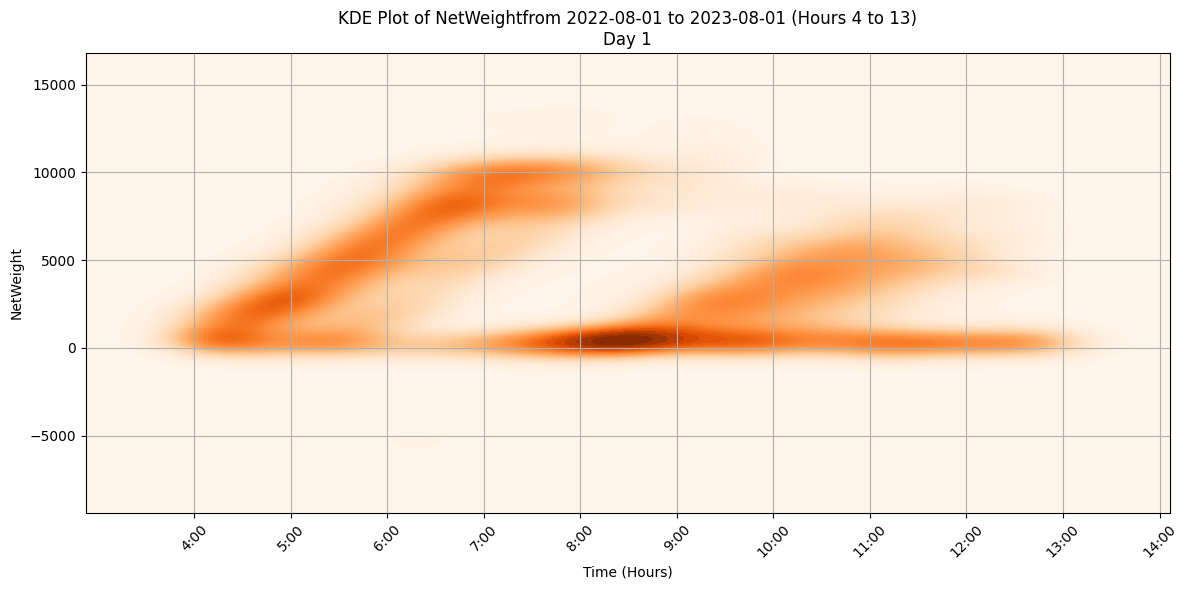

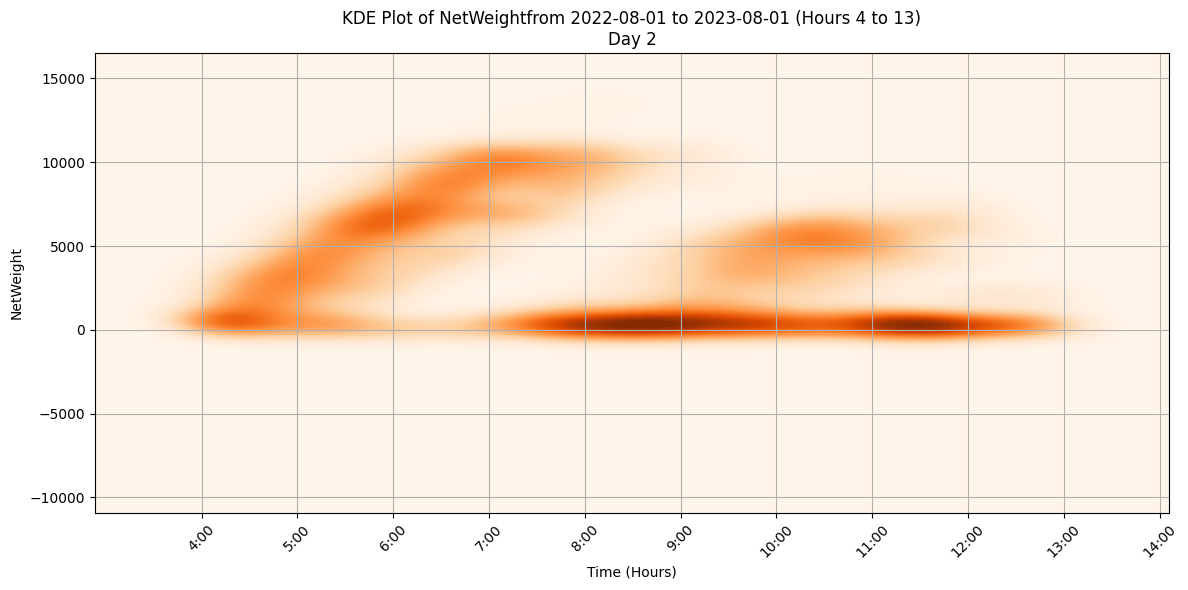

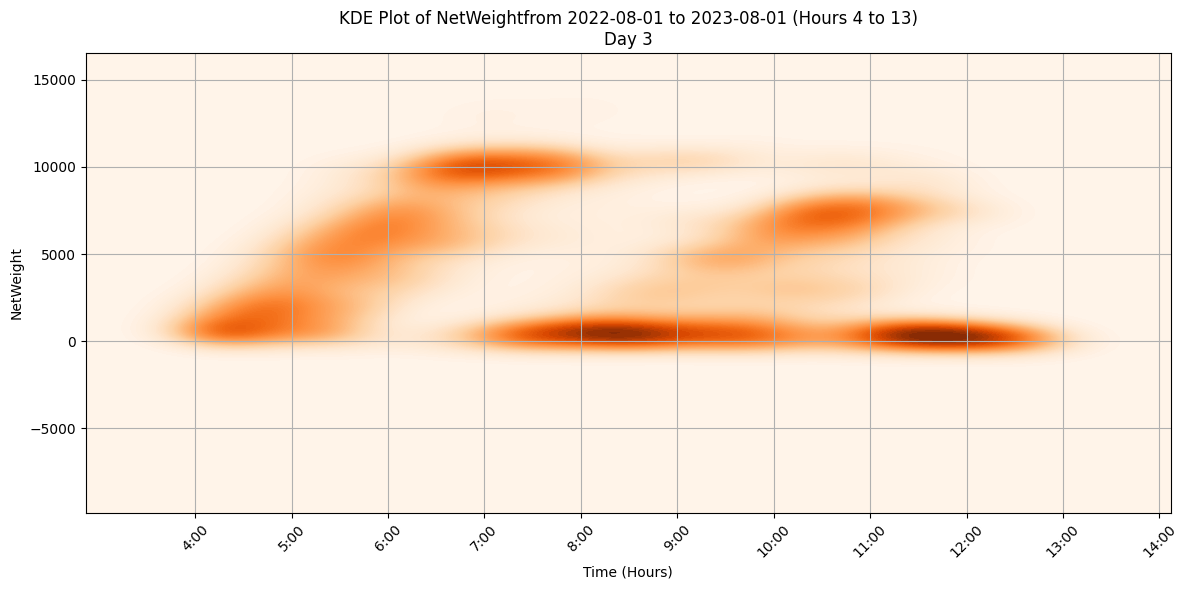

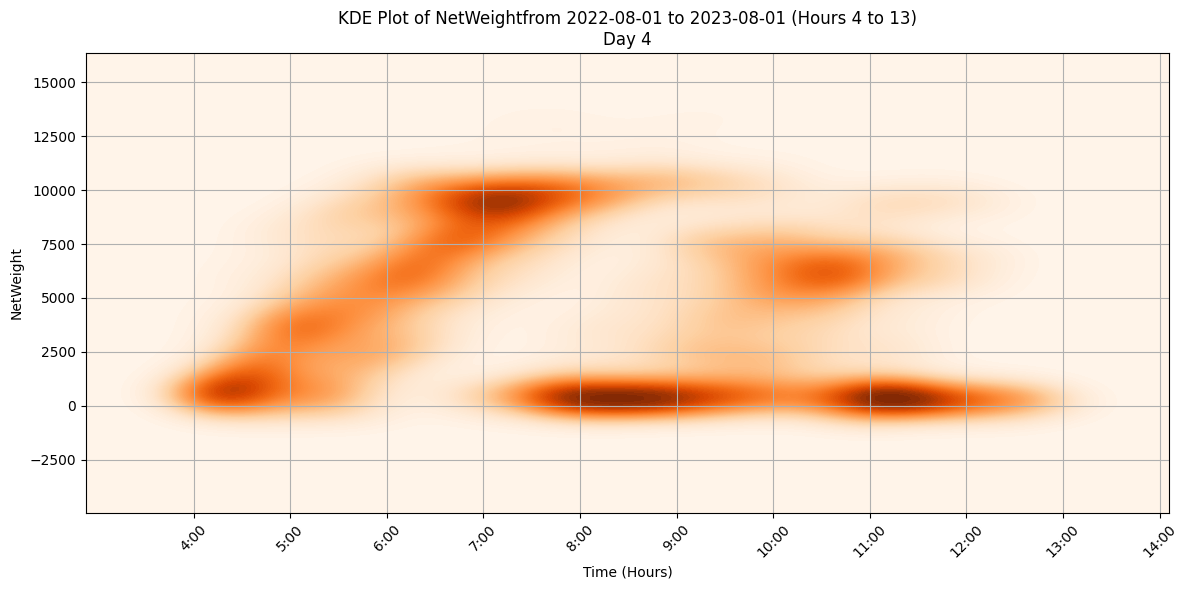

Number of rows before filtering: 309918
Number of rows after filtering by date range: 0


In [ ]:
#Explore patterns for NetWeight on the same day-of-week based on KDE plot (Kernal density plot)-note , run for a limited time period 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame already loaded with appropriate data
# and 'datetime' is the column containing the date and time information

# Make a copy of the original DataFrame to avoid altering it
df_copy = df.copy()



# Check if 'datetime' column is present
if 'datetime' not in df_copy.columns and df_copy.index.name != 'datetime':
    raise KeyError("The 'datetime' column is not found in the DataFrame or set as the index.")

# Convert 'datetime' column to datetime type if it's not already, only if 'datetime' is a column
if 'datetime' in df_copy.columns:
    df_copy['datetime'] = pd.to_datetime(df_copy['datetime'], errors='coerce')
    # Drop rows where the conversion to datetime failed (NaT)
    df_copy = df_copy.dropna(subset=['datetime'])

# If 'datetime' is not the index, set it as the index
if df_copy.index.name != 'datetime':
    df_copy.set_index('datetime', inplace=True)

# Ensure the index is of datetime type
df_copy.index = pd.to_datetime(df_copy.index, errors='coerce')

# Sort the dataframe by datetime to ensure proper order
df_copy = df_copy.sort_index()

# Define a function to filter data by date range and day of week
def filter_data(df, start_date, end_date, day_of_week=None):
    # Filter by date range
    date_filtered_df = df.loc[start_date:end_date]
    
    # Filter by day of the week (0=Monday, ..., 6=Sunday) if specified
    if day_of_week is not None:
        date_filtered_df = date_filtered_df[date_filtered_df.index.weekday == day_of_week]
    
    return date_filtered_df

# Define your start date, end date, and optionally a day of the week for all days
start_date = '2022-08-01'  # Change as needed
end_date = '2023-08-01'    # Change as needed
day_of_week = None         # Set to None to plot for all days, or specify a day (0=Monday, ..., 6=Sunday)

# Set x-axis ticks for hours from 4 to 14
x_ticks = [f'{hour}:00' for hour in range(4, 15)]

# Function to convert datetime.time to hours for plotting
def time_to_hour(t):
    return t.hour + t.minute / 60.0

# If day_of_week is None, plot for all days and for each weekday separately
if day_of_week is None:
    # Plot average for all days in the date range
    all_days_df = filter_data(df_copy, start_date, end_date)
    limited_filtered_all_days = all_days_df.between_time('04:00', '13:59')
    
    # Convert time index to hours for plotting
    limited_filtered_all_days['Hour'] = limited_filtered_all_days.index.hour + limited_filtered_all_days.index.minute / 60.0

    # Plotting the KDE for all days
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=limited_filtered_all_days, x='Hour', y='NetWeight', fill=True, cmap="Blues", thresh=0, levels=100)
    plt.xlabel('Time (Hours)')
    plt.ylabel('NetWeight')
    plt.title(f'KDE Plot of NetWeight from {start_date} to {end_date} (Hours 4 to 13)\nAll Days')
    plt.grid(True)
    
    # Set x-axis ticks to display only full hours from 4 to 14
    plt.xticks(ticks=range(4, 15), labels=x_ticks, rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot for each weekday separately (excluding Saturday (5) and Sunday (6))
    for day in range(5):  # Only 0 to 4 for weekdays, excluding 5 (Saturday) and 6 (Sunday)
        # Filter for the specified day of the week
        day_df = filter_data(df_copy, start_date, end_date, day)
        limited_filtered_day_of_week = day_df.between_time('04:00', '13:59')
        
        # Convert time index to hours for plotting
        limited_filtered_day_of_week['Hour'] = limited_filtered_day_of_week.index.hour + limited_filtered_day_of_week.index.minute / 60.0

        # Plotting the KDE for the specified day of the week
        plt.figure(figsize=(12, 6))
        sns.kdeplot(data=limited_filtered_day_of_week, x='Hour', y='NetWeight', fill=True, cmap="Oranges", thresh=0, levels=100)
        plt.xlabel('Time (Hours)')
        plt.ylabel('NetWeight')
        plt.title(f'KDE Plot of NetWeightfrom {start_date} to {end_date} (Hours 4 to 13)\nDay {day}')
        plt.grid(True)
        
        # Set x-axis ticks to display only full hours from 4 to 14
        plt.xticks(ticks=range(4, 15), labels=x_ticks, rotation=45)
        plt.tight_layout()
        plt.show()
else:
    # Plot only for the specified day of the week
    if day_of_week in [0]:  # Only process weekdays [0, 1, 2, 3, 4]:
        day_df = filter_data(df_copy, start_date, end_date, day_of_week)
        limited_filtered_day_of_week = day_df.between_time('04:00', '13:59')
        
        # Convert time index to hours for plotting
        limited_filtered_day_of_week['Hour'] = limited_filtered_day_of_week.index.hour + limited_filtered_day_of_week.index.minute / 60.0

        # Plotting the KDE for the specified day of the week
        plt.figure(figsize=(12, 6))
        sns.kdeplot(data=limited_filtered_day_of_week, x='Hour', y='NetWeight', fill=True, cmap="Blue", thresh=0, levels=100)
        plt.xlabel('Time (Hours)')
        plt.ylabel('NetWeight')
        plt.title(f'KDE Plot of NetWeight from {start_date} to {end_date} (Hours 4 to 13)\nDay {day_of_week}')
        plt.grid(True)
        
        # Set x-axis ticks to display only full hours from 4 to 14
        plt.xticks(ticks=range(4, 15), labels=x_ticks, rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping plotting for day_of_week = {day_of_week}, as it is a weekend.")

# Print the number of rows before and after filtering
print(f"Number of rows before filtering: {df.shape[0]}")
filtered_rows = filter_data(df, start_date, end_date).shape[0]
print(f"Number of rows after filtering by date range: {filtered_rows}")


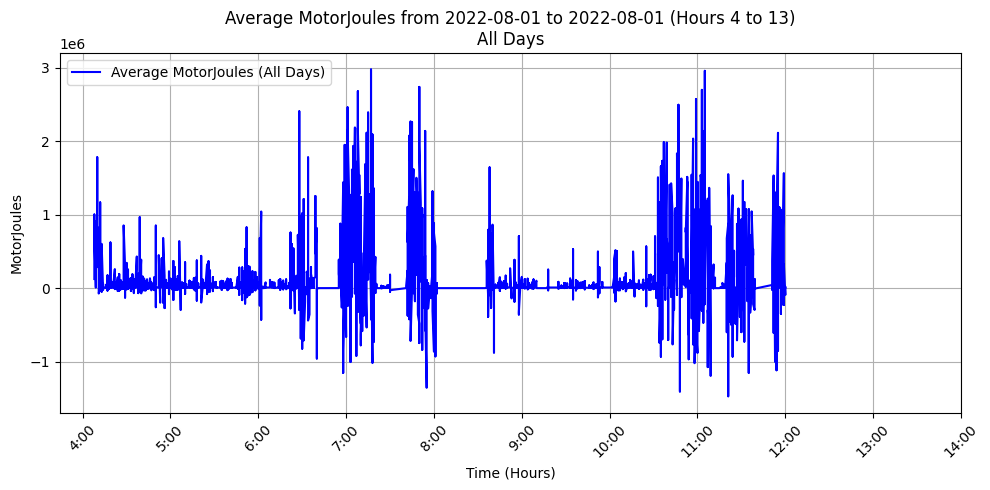

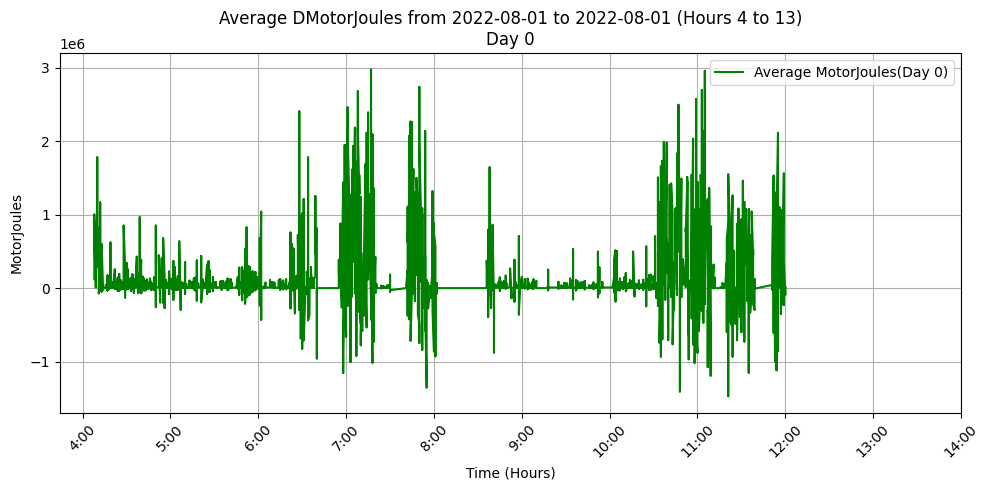

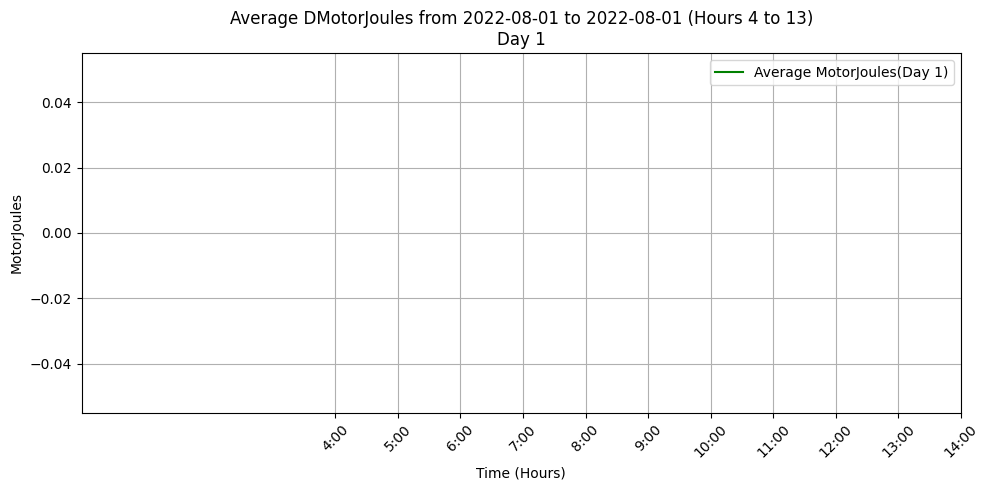

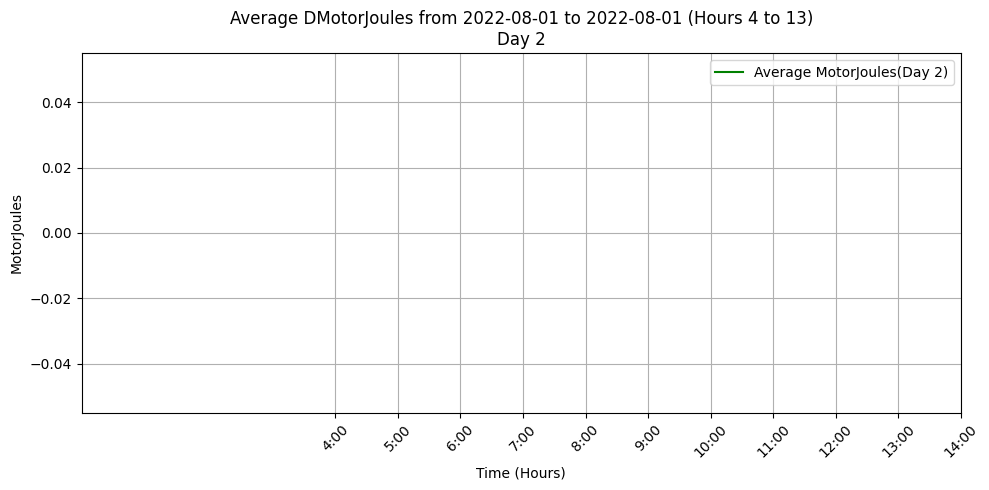

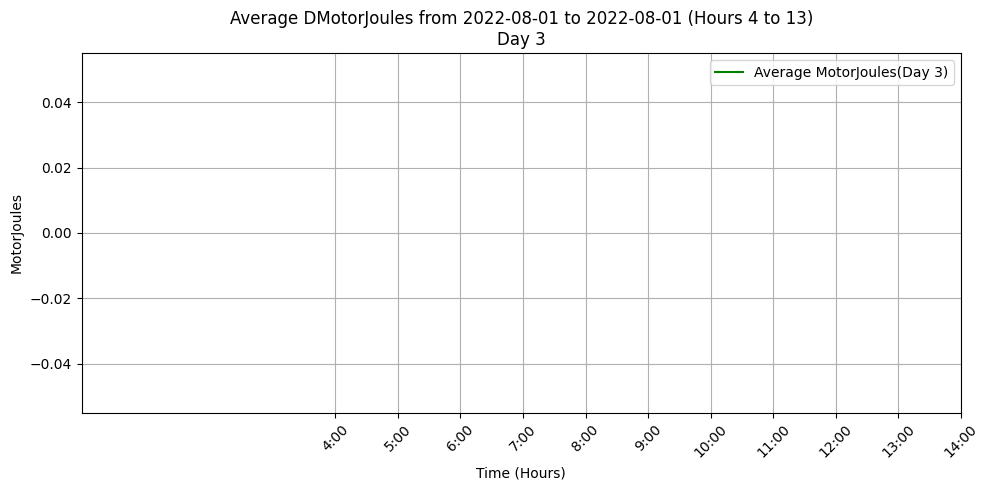

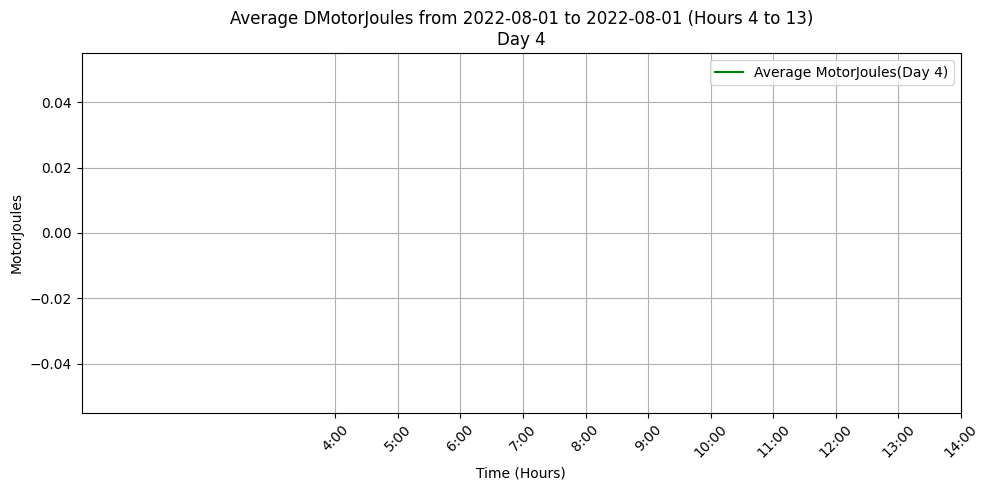

Number of rows before filtering: 309918
Number of rows after filtering by date range: 0


In [ ]:
#Explore patterns for MotorJoules on the same day-of-week

# Assuming 'df' is your DataFrame already loaded with appropriate data
# and 'datetime' is the column containing the date and time information

# Make a copy of the original DataFrame to avoid altering it
df_copy = df.copy()

# Check if 'datetime' column is present
if 'datetime' not in df_copy.columns and df_copy.index.name != 'datetime':
    raise KeyError("The 'datetime' column is not found in the DataFrame or set as the index.")

# Convert 'datetime' column to datetime type if it's not already, only if 'datetime' is a column
if 'datetime' in df_copy.columns:
    df_copy['datetime'] = pd.to_datetime(df_copy['datetime'], errors='coerce')
    # Drop rows where the conversion to datetime failed (NaT)
    df_copy = df_copy.dropna(subset=['datetime'])

# If 'datetime' is not the index, set it as the index
if df_copy.index.name != 'datetime':
    df_copy.set_index('datetime', inplace=True)

# Ensure the index is of datetime type
df_copy.index = pd.to_datetime(df_copy.index, errors='coerce')

# Sort the dataframe by datetime to ensure proper order
df_copy = df_copy.sort_index()

# Define a function to filter data by date range and day of week
def filter_data(df, start_date, end_date, day_of_week=None):
    # Filter by date range
    date_filtered_df = df.loc[start_date:end_date]
    
    # Filter by day of the week (0=Monday, ..., 6=Sunday) if specified
    if day_of_week is not None:
        date_filtered_df = date_filtered_df[date_filtered_df.index.weekday == day_of_week]
    
    return date_filtered_df

# Define your start date, end date, and optionally a day of the week for all days
start_date = '2022-08-01'  # Change as needed
end_date = '2022-08-01'    # Change as needed
day_of_week = None         # Set to None to plot for all days, or specify a day (0=Monday, ..., 6=Sunday)

# Set x-axis ticks for hours from 4 to 14
x_ticks = [f'{hour}:00' for hour in range(4, 15)]

# Function to convert datetime.time to hours for plotting
def time_to_hour(t):
    return t.hour + t.minute / 60.0

# If day_of_week is None, plot for all days and for each weekday separately
if day_of_week is None:
    # Plot average for all days in the date range
    all_days_df = filter_data(df_copy, start_date, end_date)
    limited_filtered_all_days = all_days_df.between_time('04:00', '13:59')
    average_distance_all_days = limited_filtered_all_days.groupby(limited_filtered_all_days.index.time)['MotorJoules'].mean()

    # Convert time index to hours for plotting
    average_distance_all_days.index = [time_to_hour(t) for t in average_distance_all_days.index]

    # Plotting the results for all days
    plt.figure(figsize=(10, 5))
    plt.plot(average_distance_all_days.index, average_distance_all_days, color='blue', label='Average MotorJoules (All Days)')
    plt.xlabel('Time (Hours)')
    plt.ylabel('MotorJoules')
    plt.title(f'Average MotorJoules from {start_date} to {end_date} (Hours 4 to 13)\nAll Days')
    plt.legend()
    plt.grid(True)
    
    # Set x-axis ticks to display only full hours from 4 to 14
    plt.xticks(ticks=range(4, 15), labels=x_ticks, rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot for each weekday separately (excluding Saturday (5) and Sunday (6))
    for day in range(5):  # Only 0 to 4 for weekdays, excluding 5 (Saturday) and 6 (Sunday)
        # Filter for the specified day of the week
        day_df = filter_data(df_copy, start_date, end_date, day)
        limited_filtered_day_of_week = day_df.between_time('04:00', '13:59')
        average_distance_day_of_week = limited_filtered_day_of_week.groupby(limited_filtered_day_of_week.index.time)['MotorJoules'].mean()

        # Convert time index to hours for plotting
        average_distance_day_of_week.index = [time_to_hour(t) for t in average_distance_day_of_week.index]

        # Plotting the results for the specified day of the week
        plt.figure(figsize=(10, 5))
        plt.plot(average_distance_day_of_week.index, average_distance_day_of_week, color='green', label=f'Average MotorJoules(Day {day})')
        plt.xlabel('Time (Hours)')
        plt.ylabel('MotorJoules')
        plt.title(f'Average DMotorJoules from {start_date} to {end_date} (Hours 4 to 13)\nDay {day}')
        plt.legend()
        plt.grid(True)
        
        # Set x-axis ticks to display only full hours from 4 to 14
        plt.xticks(ticks=range(4, 15), labels=x_ticks, rotation=45)
        plt.tight_layout()
        plt.show()
else:
    # Plot only for the specified day of the week
    if day_of_week in [0, 1, 2, 3, 4]:  # Only process weekdays
        day_df = filter_data(df_copy, start_date, end_date, day_of_week)
        limited_filtered_day_of_week = day_df.between_time('04:00', '13:59')
        average_distance_day_of_week = limited_filtered_day_of_week.groupby(limited_filtered_day_of_week.index.time)['MotorJoules'].mean()

        # Convert time index to hours for plotting
        average_distance_day_of_week.index = [time_to_hour(t) for t in average_distance_day_of_week.index]

        # Plotting the results for the specified day of the week
        plt.figure(figsize=(10, 5))
        plt.plot(average_distance_day_of_week.index, average_distance_day_of_week, color='orange', label=f'Average MotorJoules (Day {day_of_week})')
        plt.xlabel('Time (Hours)')
        plt.ylabel('MotorJoules')
        plt.title(f'Average DMotorJoules from {start_date} to {end_date} (Hours 4 to 13)\nDay {day_of_week}')
        plt.legend()
        plt.grid(True)
        
        # Set x-axis ticks to display only full hours from 4 to 14
        plt.xticks(ticks=range(4, 15), labels=x_ticks, rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping plotting for day_of_week = {day_of_week}, as it is a weekend.")

# Print the number of rows before and after filtering
print(f"Number of rows before filtering: {df.shape[0]}")
filtered_rows = filter_data(df, start_date, end_date).shape[0]
print(f"Number of rows after filtering by date range: {filtered_rows}")


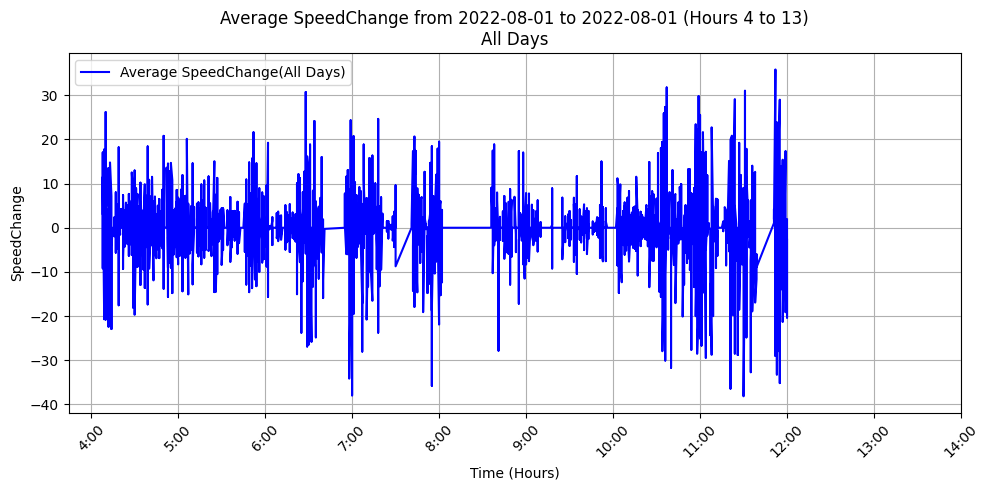

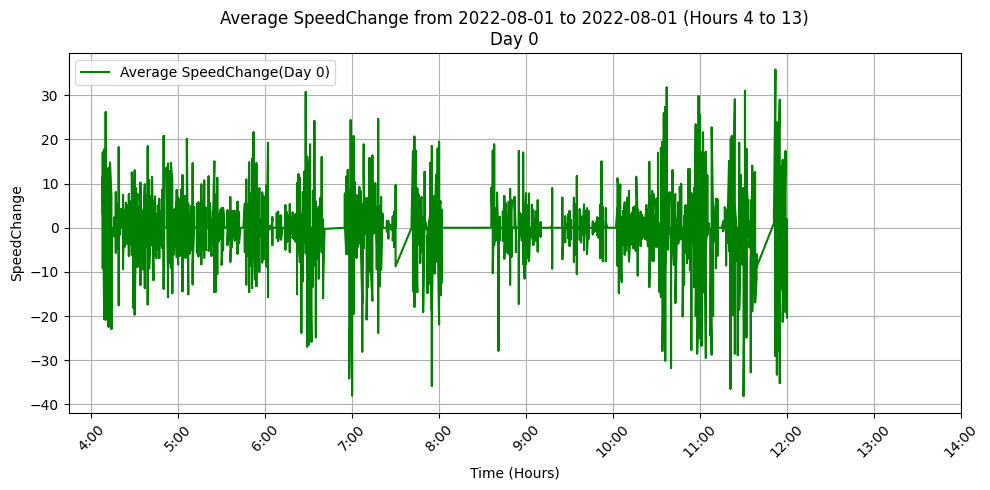

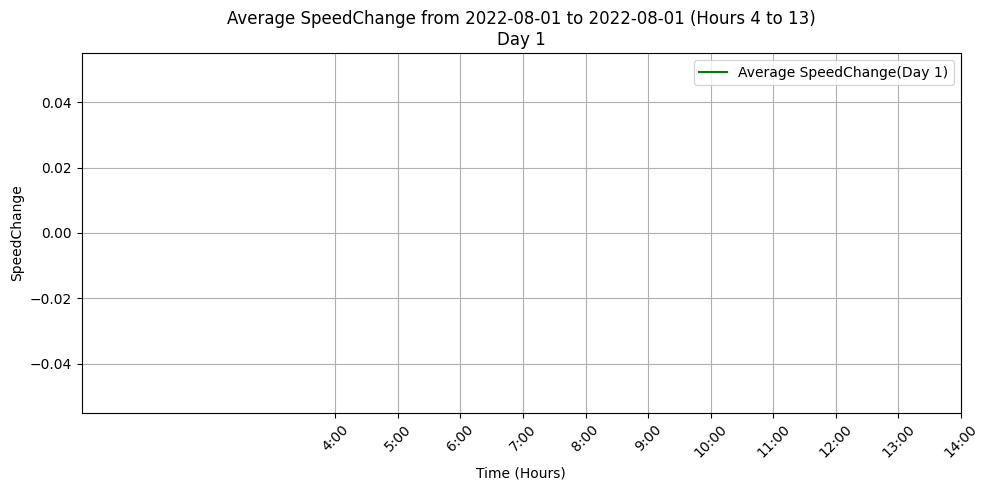

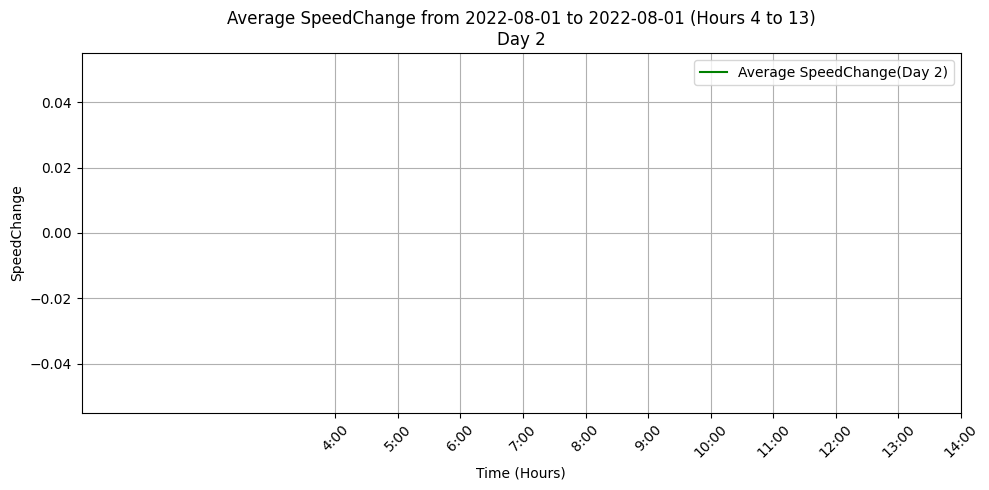

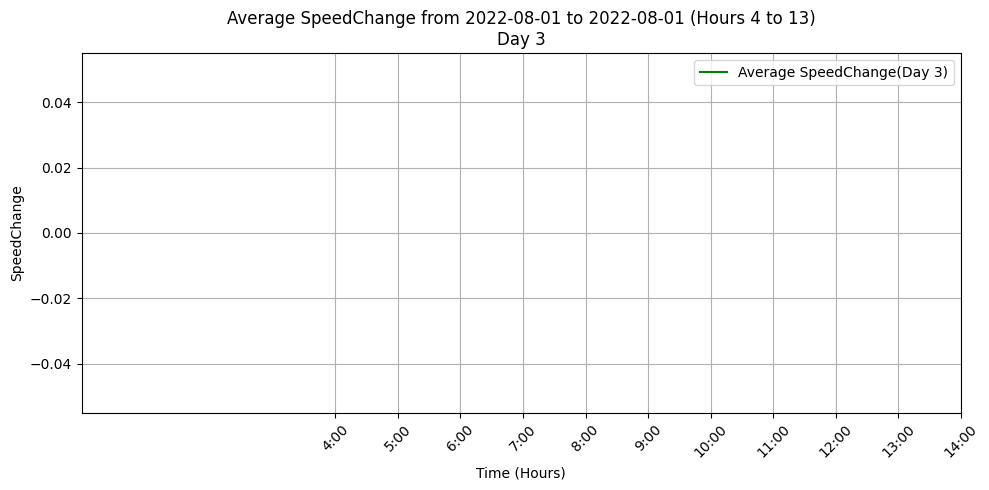

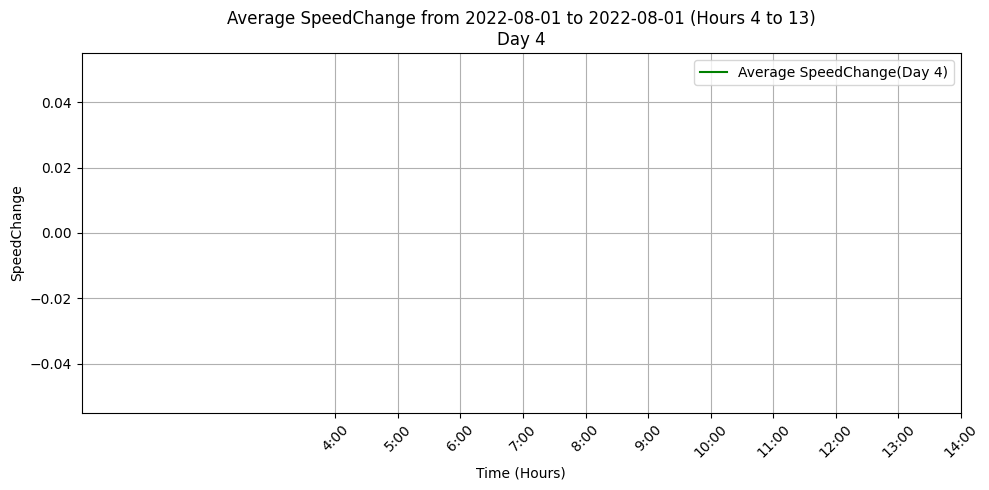

Number of rows before filtering: 309918
Number of rows after filtering by date range: 0


In [ ]:
#Explore patterns for SpeedChange on the same day-of-week

# Assuming 'df' is your DataFrame already loaded with appropriate data
# and 'datetime' is the column containing the date and time information

# Make a copy of the original DataFrame to avoid altering it
df_copy = df.copy()

# Check if 'datetime' column is present
if 'datetime' not in df_copy.columns and df_copy.index.name != 'datetime':
    raise KeyError("The 'datetime' column is not found in the DataFrame or set as the index.")

# Convert 'datetime' column to datetime type if it's not already, only if 'datetime' is a column
if 'datetime' in df_copy.columns:
    df_copy['datetime'] = pd.to_datetime(df_copy['datetime'], errors='coerce')
    # Drop rows where the conversion to datetime failed (NaT)
    df_copy = df_copy.dropna(subset=['datetime'])

# If 'datetime' is not the index, set it as the index
if df_copy.index.name != 'datetime':
    df_copy.set_index('datetime', inplace=True)

# Ensure the index is of datetime type
df_copy.index = pd.to_datetime(df_copy.index, errors='coerce')

# Sort the dataframe by datetime to ensure proper order
df_copy = df_copy.sort_index()

# Define a function to filter data by date range and day of week
def filter_data(df, start_date, end_date, day_of_week=None):
    # Filter by date range
    date_filtered_df = df.loc[start_date:end_date]
    
    # Filter by day of the week (0=Monday, ..., 6=Sunday) if specified
    if day_of_week is not None:
        date_filtered_df = date_filtered_df[date_filtered_df.index.weekday == day_of_week]
    
    return date_filtered_df

# Define your start date, end date, and optionally a day of the week for all days
start_date = '2022-08-01'  # Change as needed
end_date = '2022-08-01'    # Change as needed
day_of_week = None         # Set to None to plot for all days, or specify a day (0=Monday, ..., 6=Sunday)

# Set x-axis ticks for hours from 4 to 14
x_ticks = [f'{hour}:00' for hour in range(4, 15)]

# Function to convert datetime.time to hours for plotting
def time_to_hour(t):
    return t.hour + t.minute / 60.0

# If day_of_week is None, plot for all days and for each weekday separately
if day_of_week is None:
    # Plot average for all days in the date range
    all_days_df = filter_data(df_copy, start_date, end_date)
    limited_filtered_all_days = all_days_df.between_time('04:00', '13:59')
    average_distance_all_days = limited_filtered_all_days.groupby(limited_filtered_all_days.index.time)['SpeedChange'].mean()

    # Convert time index to hours for plotting
    average_distance_all_days.index = [time_to_hour(t) for t in average_distance_all_days.index]

    # Plotting the results for all days
    plt.figure(figsize=(10, 5))
    plt.plot(average_distance_all_days.index, average_distance_all_days, color='blue', label='Average SpeedChange(All Days)')
    plt.xlabel('Time (Hours)')
    plt.ylabel('SpeedChange')
    plt.title(f'Average SpeedChange from {start_date} to {end_date} (Hours 4 to 13)\nAll Days')
    plt.legend()
    plt.grid(True)
    
    # Set x-axis ticks to display only full hours from 4 to 14
    plt.xticks(ticks=range(4, 15), labels=x_ticks, rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot for each weekday separately (excluding Saturday (5) and Sunday (6))
    for day in range(5):  # Only 0 to 4 for weekdays, excluding 5 (Saturday) and 6 (Sunday)
        # Filter for the specified day of the week
        day_df = filter_data(df_copy, start_date, end_date, day)
        limited_filtered_day_of_week = day_df.between_time('04:00', '13:59')
        average_distance_day_of_week = limited_filtered_day_of_week.groupby(limited_filtered_day_of_week.index.time)['SpeedChange'].mean()

        # Convert time index to hours for plotting
        average_distance_day_of_week.index = [time_to_hour(t) for t in average_distance_day_of_week.index]

        # Plotting the results for the specified day of the week
        plt.figure(figsize=(10, 5))
        plt.plot(average_distance_day_of_week.index, average_distance_day_of_week, color='green', label=f'Average SpeedChange(Day {day})')
        plt.xlabel('Time (Hours)')
        plt.ylabel('SpeedChange')
        plt.title(f'Average SpeedChange from {start_date} to {end_date} (Hours 4 to 13)\nDay {day}')
        plt.legend()
        plt.grid(True)
        
        # Set x-axis ticks to display only full hours from 4 to 14
        plt.xticks(ticks=range(4, 15), labels=x_ticks, rotation=45)
        plt.tight_layout()
        plt.show()
else:
    # Plot only for the specified day of the week
    if day_of_week in [0, 1, 2, 3, 4]:  # Only process weekdays
        day_df = filter_data(df_copy, start_date, end_date, day_of_week)
        limited_filtered_day_of_week = day_df.between_time('04:00', '13:59')
        average_distance_day_of_week = limited_filtered_day_of_week.groupby(limited_filtered_day_of_week.index.time)[''].mean()

        # Convert time index to hours for plotting
        average_distance_day_of_week.index = [time_to_hour(t) for t in average_distance_day_of_week.index]

        # Plotting the results for the specified day of the week
        plt.figure(figsize=(10, 5))
        plt.plot(average_distance_day_of_week.index, average_distance_day_of_week, color='purple', label=f'Average SpeedChange (Day {day_of_week})')
        plt.xlabel('Time (Hours)')
        plt.ylabel('SpeedChange')
        plt.title(f'Average SpeedChange from {start_date} to {end_date} (Hours 4 to 13)\nDay {day_of_week}')
        plt.legend()
        plt.grid(True)
        
        # Set x-axis ticks to display only full hours from 4 to 14
        plt.xticks(ticks=range(4, 15), labels=x_ticks, rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping plotting for day_of_week = {day_of_week}, as it is a weekend.")

# Print the number of rows before and after filtering
print(f"Number of rows before filtering: {df.shape[0]}")
filtered_rows = filter_data(df, start_date, end_date).shape[0]
print(f"Number of rows after filtering by date range: {filtered_rows}")


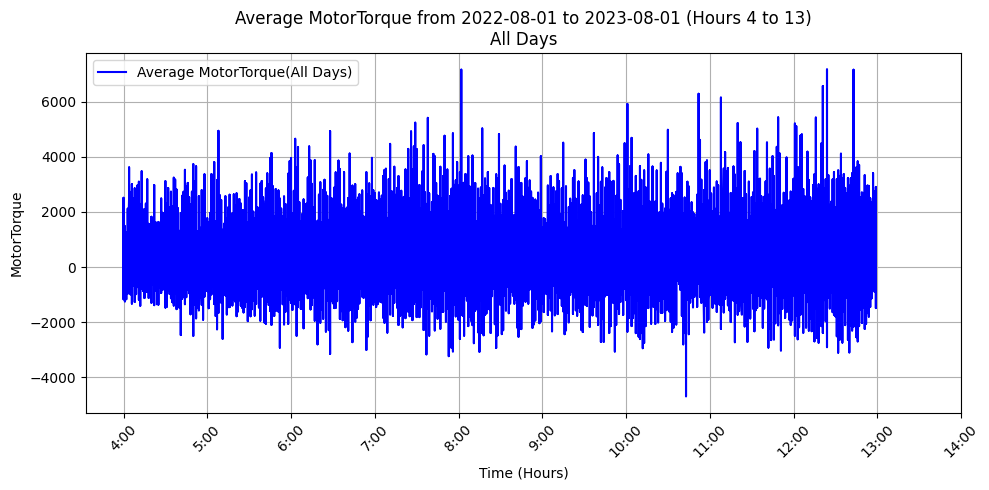

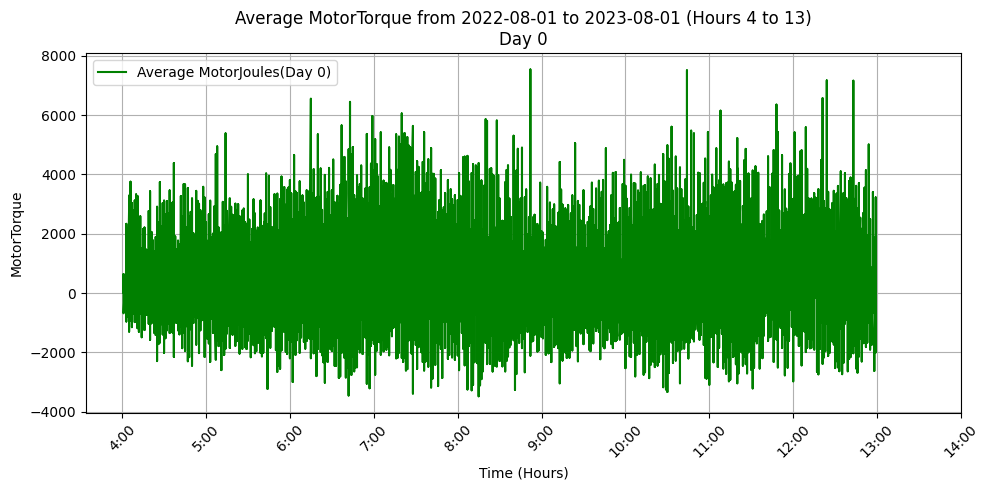

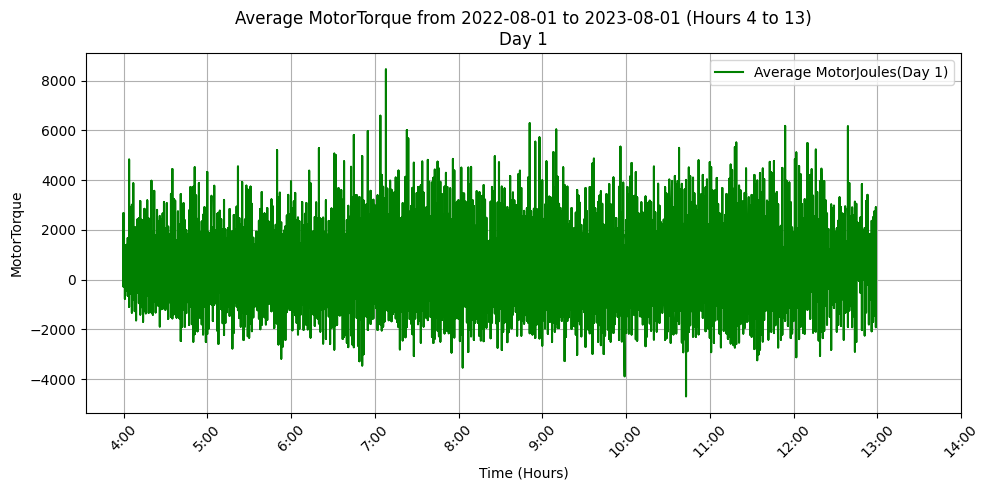

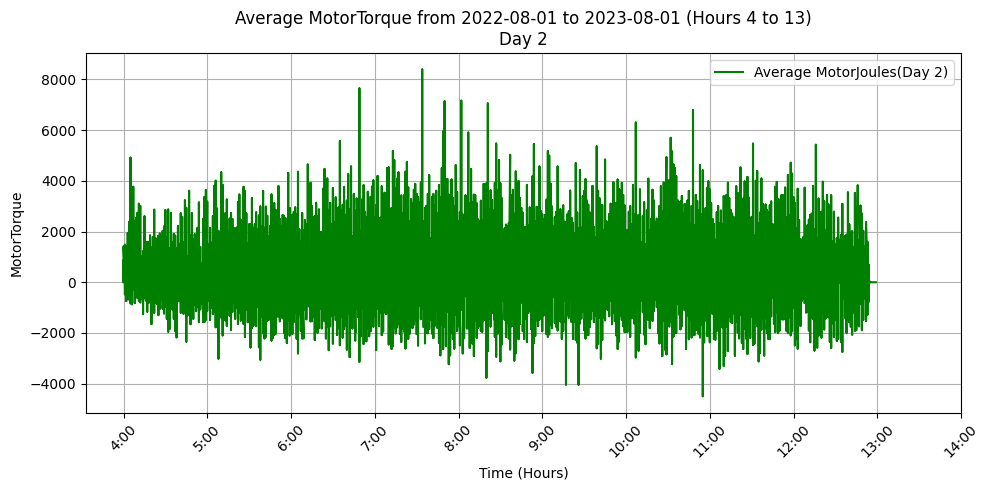

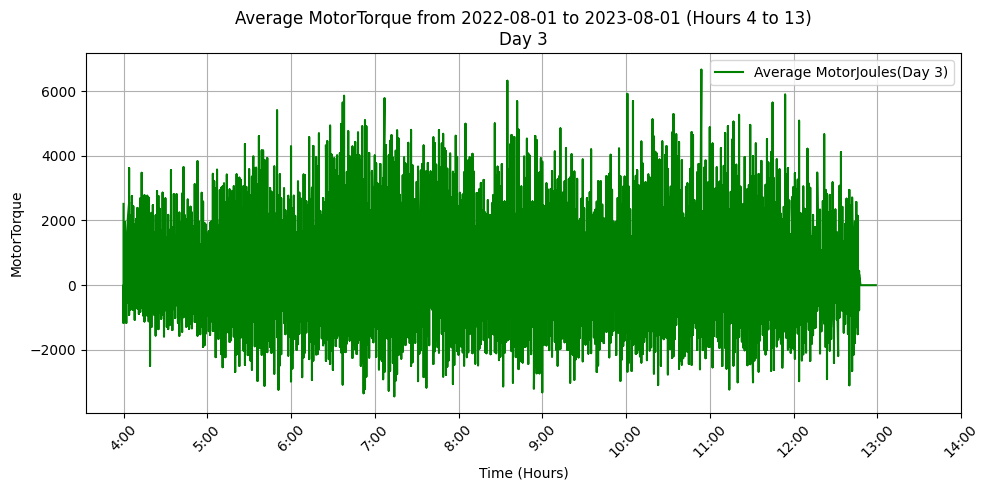

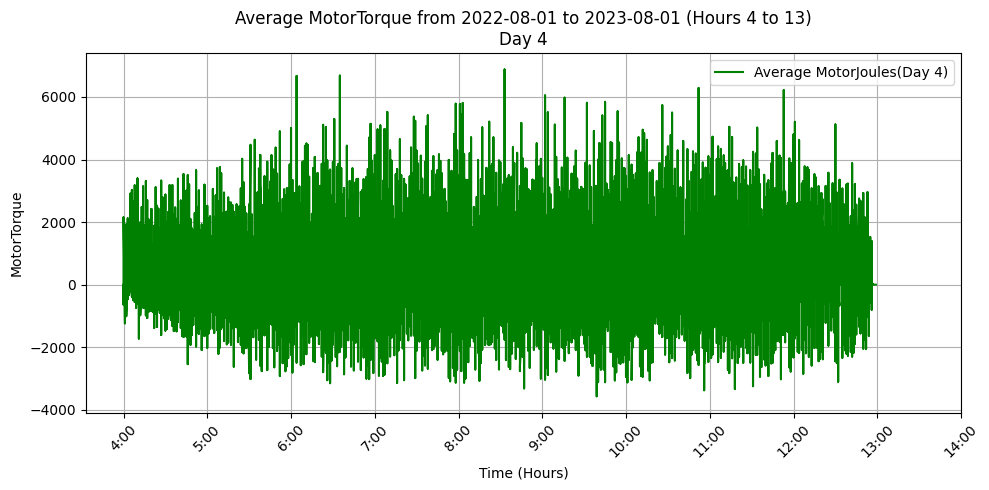

Number of rows before filtering: 309918
Number of rows after filtering by date range: 0


In [ ]:


#Explore patterns for MotorTorque on the same day-of-week

# Assuming 'df' is your DataFrame already loaded with appropriate data
# and 'datetime' is the column containing the date and time information

# Make a copy of the original DataFrame to avoid altering it
df_copy = df.copy()

# Check if 'datetime' column is present
if 'datetime' not in df_copy.columns and df_copy.index.name != 'datetime':
    raise KeyError("The 'datetime' column is not found in the DataFrame or set as the index.")

# Convert 'datetime' column to datetime type if it's not already, only if 'datetime' is a column
if 'datetime' in df_copy.columns:
    df_copy['datetime'] = pd.to_datetime(df_copy['datetime'], errors='coerce')
    # Drop rows where the conversion to datetime failed (NaT)
    df_copy = df_copy.dropna(subset=['datetime'])

# If 'datetime' is not the index, set it as the index
if df_copy.index.name != 'datetime':
    df_copy.set_index('datetime', inplace=True)

# Ensure the index is of datetime type
df_copy.index = pd.to_datetime(df_copy.index, errors='coerce')

# Sort the dataframe by datetime to ensure proper order
df_copy = df_copy.sort_index()

# Define a function to filter data by date range and day of week
def filter_data(df, start_date, end_date, day_of_week=None):
    # Filter by date range
    date_filtered_df = df.loc[start_date:end_date]
    
    # Filter by day of the week (0=Monday, ..., 6=Sunday) if specified
    if day_of_week is not None:
        date_filtered_df = date_filtered_df[date_filtered_df.index.weekday == day_of_week]
    
    return date_filtered_df

# Define your start date, end date, and optionally a day of the week for all days
start_date = '2022-08-01'  # Change as needed
end_date = '2023-08-01'    # Change as needed
day_of_week = None         # Set to None to plot for all days, or specify a day (0=Monday, ..., 6=Sunday)

# Set x-axis ticks for hours from 4 to 14
x_ticks = [f'{hour}:00' for hour in range(4, 15)]

# Function to convert datetime.time to hours for plotting
def time_to_hour(t):
    return t.hour + t.minute / 60.0

# If day_of_week is None, plot for all days and for each weekday separately
if day_of_week is None:
    # Plot average for all days in the date range
    all_days_df = filter_data(df_copy, start_date, end_date)
    limited_filtered_all_days = all_days_df.between_time('04:00', '13:59')
    average_distance_all_days = limited_filtered_all_days.groupby(limited_filtered_all_days.index.time)['MotorTorque'].mean()

    # Convert time index to hours for plotting
    average_distance_all_days.index = [time_to_hour(t) for t in average_distance_all_days.index]

    # Plotting the results for all days
    plt.figure(figsize=(10, 5))
    plt.plot(average_distance_all_days.index, average_distance_all_days, color='blue', label='Average MotorTorque(All Days)')
    plt.xlabel('Time (Hours)')
    plt.ylabel('MotorTorque')
    plt.title(f'Average MotorTorque from {start_date} to {end_date} (Hours 4 to 13)\nAll Days')
    plt.legend()
    plt.grid(True)
    
    # Set x-axis ticks to display only full hours from 4 to 14
    plt.xticks(ticks=range(4, 15), labels=x_ticks, rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot for each weekday separately (excluding Saturday (5) and Sunday (6))
    for day in range(5):  # Only 0 to 4 for weekdays, excluding 5 (Saturday) and 6 (Sunday)
        # Filter for the specified day of the week
        day_df = filter_data(df_copy, start_date, end_date, day)
        limited_filtered_day_of_week = day_df.between_time('04:00', '13:59')
        average_distance_day_of_week = limited_filtered_day_of_week.groupby(limited_filtered_day_of_week.index.time)['MotorTorque'].mean()

        # Convert time index to hours for plotting
        average_distance_day_of_week.index = [time_to_hour(t) for t in average_distance_day_of_week.index]

        # Plotting the results for the specified day of the week
        plt.figure(figsize=(10, 5))
        plt.plot(average_distance_day_of_week.index, average_distance_day_of_week, color='green', label=f'Average MotorJoules(Day {day})')
        plt.xlabel('Time (Hours)')
        plt.ylabel('MotorTorque')
        plt.title(f'Average MotorTorque from {start_date} to {end_date} (Hours 4 to 13)\nDay {day}')
        plt.legend()
        plt.grid(True)
        
        # Set x-axis ticks to display only full hours from 4 to 14
        plt.xticks(ticks=range(4, 15), labels=x_ticks, rotation=45)
        plt.tight_layout()
        plt.show()
else:
    # Plot only for the specified day of the week
    if day_of_week in [0, 1, 2, 3, 4]:  # Only process weekdays
        day_df = filter_data(df_copy, start_date, end_date, day_of_week)
        limited_filtered_day_of_week = day_df.between_time('04:00', '13:59')
        average_distance_day_of_week = limited_filtered_day_of_week.groupby(limited_filtered_day_of_week.index.time)['MotorTorque'].mean()

        # Convert time index to hours for plotting
        average_distance_day_of_week.index = [time_to_hour(t) for t in average_distance_day_of_week.index]

        # Plotting the results for the specified day of the week
        plt.figure(figsize=(10, 5))
        plt.plot(average_distance_day_of_week.index, average_distance_day_of_week, color='purple', label=f'Average MotorTorque (Day {day_of_week})')
        plt.xlabel('Time (Hours)')
        plt.ylabel('MotorTorque')
        plt.title(f'Average MotorTorque from {start_date} to {end_date} (Hours 4 to 13)\nDay {day_of_week}')
        plt.legend()
        plt.grid(True)
        
        # Set x-axis ticks to display only full hours from 4 to 14
        plt.xticks(ticks=range(4, 15), labels=x_ticks, rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping plotting for day_of_week = {day_of_week}, as it is a weekend.")

# Print the number of rows before and after filtering
print(f"Number of rows before filtering: {df.shape[0]}")
filtered_rows = filter_data(df, start_date, end_date).shape[0]
print(f"Number of rows after filtering by date range: {filtered_rows}")


END OF PLOT BASIC FEATURES

In [ ]:
raise SystemExit("Stopping execution of  END OF PLOT BASIC FEATURES.")

SystemExit: Stopping execution of  END OF PLOT BASIC FEATURES.

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


CHECK CLUSTERING

Distance Matrix (condensed form):
[0.48852357 0.89197609 0.99818774 ... 0.99055659 0.99731038 0.99601668]
Non-finite values detected in the distance matrix. Cleaning up...


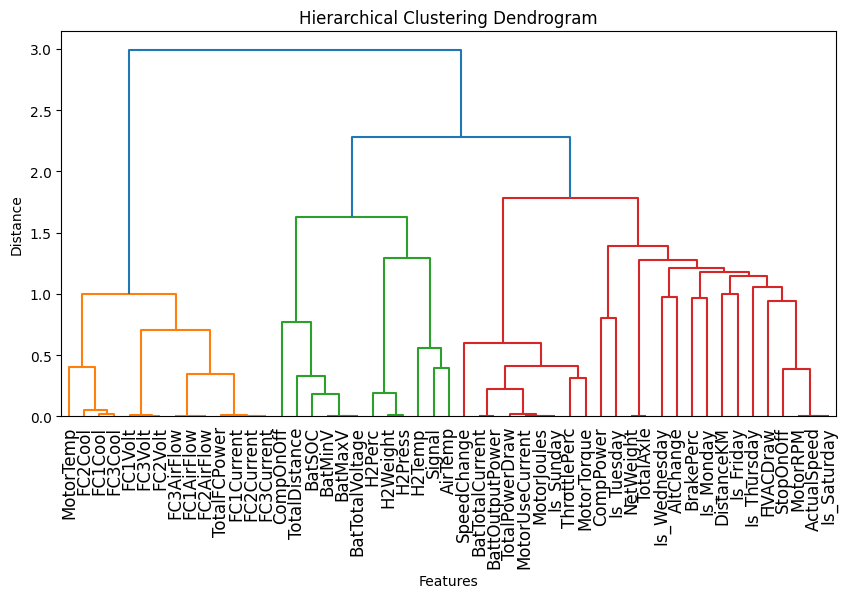

In [ ]:
#Check hierarchical clustering to check which features are realted to eachother
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform


# Ensure 'datetime' is treated as a datetime column (if present) and not used in correlation
if 'datetime' in df.columns:
    df['datetime'] = pd.to_datetime(df['datetime'])

# Filter out non-numeric columns before calculating the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Replace NaNs and infinite values in the correlation matrix
corr_matrix = corr_matrix.replace([np.inf, -np.inf], np.nan)
corr_matrix = corr_matrix.fillna(0)

# Compute the distance matrix using pdist to ensure non-negative distances
# Use 'correlation' metric in pdist
dist_matrix = pdist(numeric_df.T, metric='correlation')  # Transpose to calculate distances between features

# Check for non-finite values in the distance matrix
print("Distance Matrix (condensed form):")
print(dist_matrix)

# Ensure the distance matrix contains only finite values
if not np.all(np.isfinite(dist_matrix)):
    print("Non-finite values detected in the distance matrix. Cleaning up...")
    dist_matrix = np.nan_to_num(dist_matrix)  # Replace NaNs and infinite values with zero

# Apply hierarchical clustering
try:
    Z = linkage(dist_matrix, method='ward')
    
    # Plot the dendrogram
    plt.figure(figsize=(10, 5))
    dendrogram(Z, labels=numeric_df.columns, leaf_rotation=90, leaf_font_size=12)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Features')
    plt.ylabel('Distance')
    plt.show()
except ValueError as e:
    print(f"Error in linkage calculation: {e}")
    print("Inspecting the distance matrix for issues...")
    if not np.all(np.isfinite(dist_matrix)):
        print("The distance matrix contains non-finite values. Here are the problematic values:")
        print(dist_matrix[np.isinf(dist_matrix) | np.isnan(dist_matrix)])
    else:
        print("All values in the distance matrix are finite. Please check other potential issues.")


PLOT BASIC FEATURES AGAINST FEATURE FOR ENERGY USE

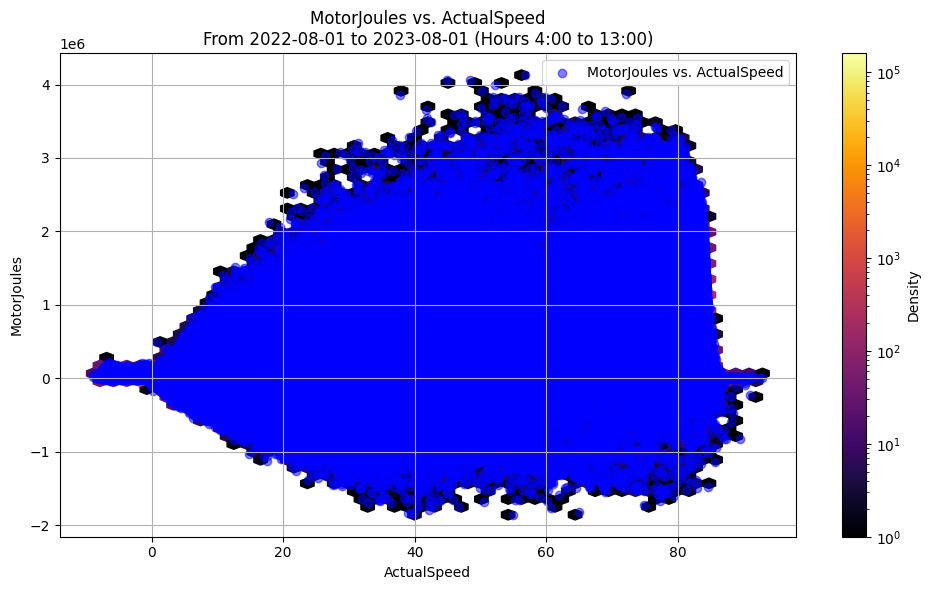

Number of rows before filtering: 309857
Number of rows after filtering: 308851


In [ ]:
#Plot MotorJoules against ActualSpeed
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'datetime' column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Define the date range and time range for filtering
start_date = '2022-08-01'  # Change to your desired start date
end_date = '2023-08-01'    # Change to your desired end date
start_time = 4   # Starting hour
end_time = 13    # Ending hour (not inclusive)

# Filter the dataframe for the specific date range
filtered_df = df[(df['datetime'] >= pd.to_datetime(start_date)) & 
                 (df['datetime'] <= pd.to_datetime(end_date))]

# Further filter the dataframe for the specific time range within each day
filtered_df = filtered_df[(filtered_df['datetime'].dt.hour >= start_time) & 
                          (filtered_df['datetime'].dt.hour < end_time)]

# Plotting 'MotorJoules' against 'ActualSpeed' with density
plt.figure(figsize=(10, 6))
plt.hexbin(filtered_df['ActualSpeed'], filtered_df['MotorJoules'], gridsize=50, cmap='inferno', bins='log')
plt.colorbar(label='Density')

# Add scatter plot on top
plt.scatter(filtered_df['ActualSpeed'], filtered_df['MotorJoules'], color='blue', alpha=0.5, label='MotorJoules vs. ActualSpeed')

plt.xlabel('ActualSpeed')
plt.ylabel('MotorJoules')
plt.title(f'MotorJoules vs. ActualSpeed\nFrom {start_date} to {end_date} (Hours {start_time}:00 to {end_time}:00)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print number of rows before and after filtering
print(f"Number of rows before filtering: {df.shape[0]}")
print(f"Number of rows after filtering: {filtered_df.shape[0]}")


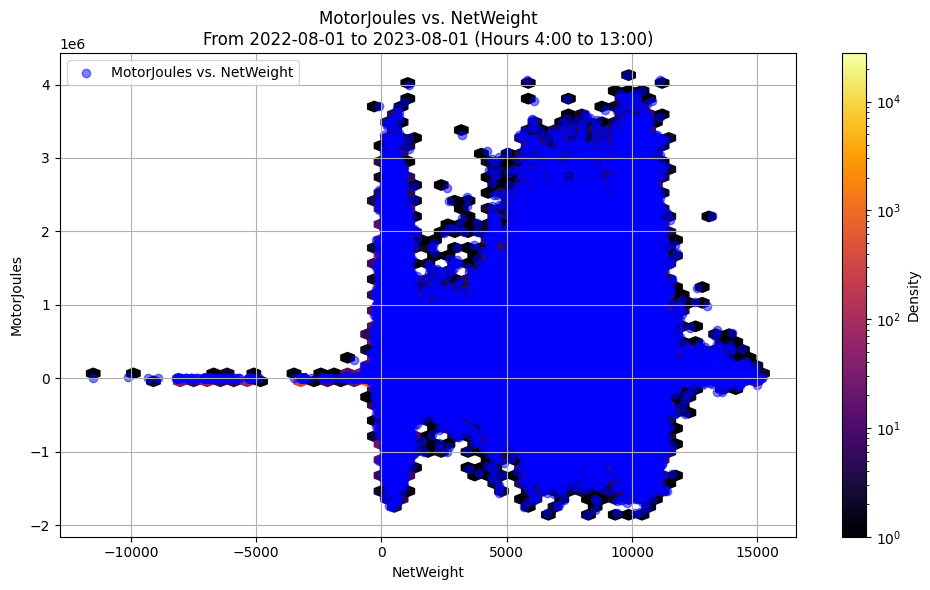

Number of rows before filtering: 309857
Number of rows after filtering: 308851


In [ ]:
#Plot MotorJoules against NetWeight
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'datetime' column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Define the date range and time range for filtering
start_date = '2022-08-01'  # Change to your desired start date
end_date = '2023-08-01'    # Change to your desired end date
start_time = 4   # Starting hour
end_time = 13    # Ending hour (not inclusive)

# Filter the dataframe for the specific date range
filtered_df = df[(df['datetime'] >= pd.to_datetime(start_date)) & 
                 (df['datetime'] <= pd.to_datetime(end_date))]

# Further filter the dataframe for the specific time range within each day
filtered_df = filtered_df[(filtered_df['datetime'].dt.hour >= start_time) & 
                          (filtered_df['datetime'].dt.hour < end_time)]

# Plotting 'MotorJoules' against 'NetWeight' with density
plt.figure(figsize=(10, 6))
plt.hexbin(filtered_df['NetWeight'], filtered_df['MotorJoules'], gridsize=50, cmap='inferno', bins='log')
plt.colorbar(label='Density')

# Add scatter plot on top
plt.scatter(filtered_df['NetWeight'], filtered_df['MotorJoules'], color='blue', alpha=0.5, label='MotorJoules vs. NetWeight')

plt.xlabel('NetWeight')
plt.ylabel('MotorJoules')
plt.title(f'MotorJoules vs. NetWeight\nFrom {start_date} to {end_date} (Hours {start_time}:00 to {end_time}:00)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print number of rows before and after filtering
print(f"Number of rows before filtering: {df.shape[0]}")
print(f"Number of rows after filtering: {filtered_df.shape[0]}")


In [ ]:
#Outliers found in Netweight

column_name = 'NetWeight'
first_100_values = df[column_name].head(100)
max_value = df[column_name].max()
min_value = df[column_name].min()

print("First 100 values of", column_name, "column:")
print(first_100_values)
print("Max value of", column_name, "column:", max_value)
print("Min value of", column_name, "column:", min_value)

First 100 values of NetWeight column:
24      900.0
25      800.0
26      900.0
27     1100.0
28      900.0
        ...  
119    1000.0
120    1100.0
121    1700.0
122    1000.0
123    1000.0
Name: NetWeight, Length: 100, dtype: float64
Max value of NetWeight column: 15200.0
Min value of NetWeight column: -11500.0


In [ ]:
#Remove Outliers in NetWeight(NetWeight cannot be negative)
print(f"Number of rows before filtering: {df.shape[0]}")
df = df[df['NetWeight'] >= 0]


print(f"Number of rows after filtering: {filtered_df.shape[0]}")

Number of rows before filtering: 309857
Number of rows after filtering: 308851


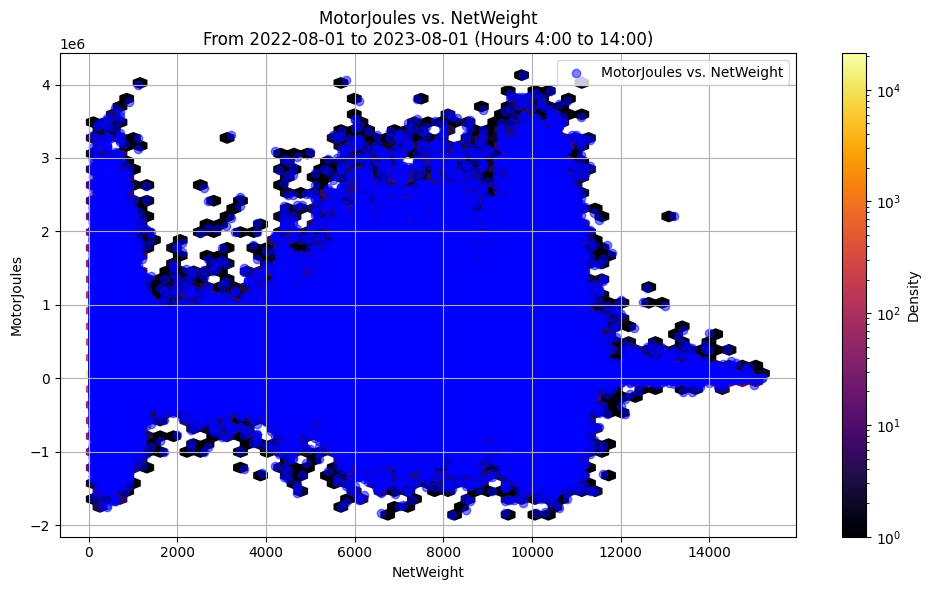

Number of rows before filtering: 298670
Number of rows after filtering: 297772


In [ ]:
#Plot MotorJoules against NetWeight
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'datetime' column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Define the date range and time range for filtering
start_date = '2022-08-01'  # Change to your desired start date
end_date = '2023-08-01'    # Change to your desired end date
start_time = 4   # Starting hour
end_time = 14    # Ending hour (not inclusive)

# Filter the dataframe for the specific date range
filtered_df = df[(df['datetime'] >= pd.to_datetime(start_date)) & 
                 (df['datetime'] <= pd.to_datetime(end_date))]

# Further filter the dataframe for the specific time range within each day
filtered_df = filtered_df[(filtered_df['datetime'].dt.hour >= start_time) & 
                          (filtered_df['datetime'].dt.hour < end_time)]

# Plot MotorJoules against NetWeight with density
plt.figure(figsize=(10, 6))
plt.hexbin(filtered_df['NetWeight'], filtered_df['MotorJoules'], gridsize=50, cmap='inferno', bins='log')
plt.colorbar(label='Density')

# Add scatter plot on top
plt.scatter(filtered_df['NetWeight'], filtered_df['MotorJoules'], color='blue', alpha=0.5, label='MotorJoules vs. NetWeight')

plt.xlabel('NetWeight')
plt.ylabel('MotorJoules')
plt.title(f'MotorJoules vs. NetWeight\nFrom {start_date} to {end_date} (Hours {start_time}:00 to {end_time}:00)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print number of rows before and after filtering
print(f"Number of rows before filtering: {df.shape[0]}")
print(f"Number of rows after filtering: {filtered_df.shape[0]}")


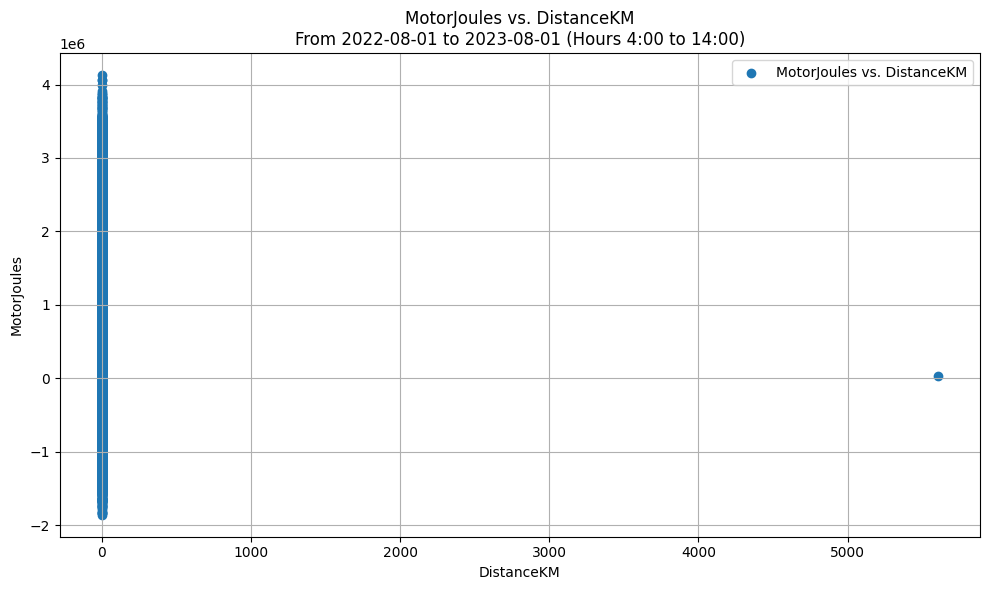

Number of rows before filtering: 298670
Number of rows after filtering: 297772


In [ ]:
#Plot MotorJoules against DistanceKM
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'datetime' column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Define the date range and time range for filtering
start_date = '2022-08-01'  # Change to your desired start date
end_date = '2023-08-01'    # Change to your desired end date
start_time = 4   # Starting hour
end_time = 14    # Ending hour (not inclusive)

# Filter the dataframe for the specific date range
filtered_df = df[(df['datetime'] >= pd.to_datetime(start_date)) & 
                 (df['datetime'] <= pd.to_datetime(end_date))]

# Further filter the dataframe for the specific time range within each day
filtered_df = filtered_df[(filtered_df['datetime'].dt.hour >= start_time) & 
                          (filtered_df['datetime'].dt.hour < end_time)]

# Plotting 'MotorJoules' against 'ActualSpeed'
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['DistanceKM'], filtered_df['MotorJoules'], label='MotorJoules vs. DistanceKM')
plt.xlabel('DistanceKM')
plt.ylabel('MotorJoules')
plt.title(f'MotorJoules vs. DistanceKM\nFrom {start_date} to {end_date} (Hours {start_time}:00 to {end_time}:00)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print number of rows before and after filtering
print(f"Number of rows before filtering: {df.shape[0]}")
print(f"Number of rows after filtering: {filtered_df.shape[0]}")


In [ ]:
#Outliers found in DistanceKM

column_name = 'DistanceKM'
first_100_values = df[column_name].head(100)
max_value = df[column_name].max()
min_value = df[column_name].min()

print("First 100 values of", column_name, "column:")
print(first_100_values)
print("Max value of", column_name, "column:", max_value)
print("Min value of", column_name, "column:", min_value)


First 100 values of DistanceKM column:
24     0.013397
25     0.019182
26     0.045789
27     0.035038
28     0.101447
         ...   
119    0.005459
120    0.012702
121    0.000635
122    0.000635
123    0.000635
Name: DistanceKM, Length: 100, dtype: float64
Max value of DistanceKM column: 5607.106007743323
Min value of DistanceKM column: 1.1882379508772482e-06


In [ ]:
#Remove Outliers in DistanceKM
print(f"Number of rows before filtering: {df.shape[0]}")
df = df[df['DistanceKM'] <= 0.3]


print(f"Number of rows after filtering: {filtered_df.shape[0]}")

Number of rows before filtering: 298670
Number of rows after filtering: 297772


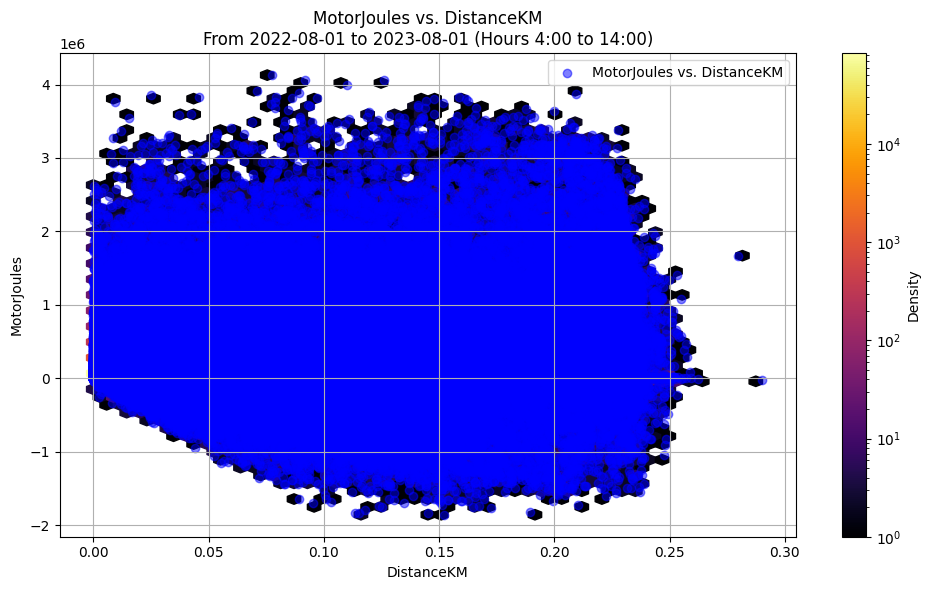

Number of rows before filtering: 298658
Number of rows after filtering: 297760


In [ ]:
#Plot MotorJoules against DistanceKM after removing Outliers
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'datetime' column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Define the date range and time range for filtering
start_date = '2022-08-01'  # Change to your desired start date
end_date = '2023-08-01'    # Change to your desired end date
start_time = 4   # Starting hour
end_time = 14    # Ending hour (not inclusive)

# Filter the dataframe for the specific date range
filtered_df = df[(df['datetime'] >= pd.to_datetime(start_date)) & 
                 (df['datetime'] <= pd.to_datetime(end_date))]

# Further filter the dataframe for the specific time range within each day
filtered_df = filtered_df[(filtered_df['datetime'].dt.hour >= start_time) & 
                          (filtered_df['datetime'].dt.hour < end_time)]

# Plot MotorJoules against DistanceKM with density
plt.figure(figsize=(10, 6))
plt.hexbin(filtered_df['DistanceKM'], filtered_df['MotorJoules'], gridsize=50, cmap='inferno', bins='log')
plt.colorbar(label='Density')

# Add scatter plot on top
plt.scatter(filtered_df['DistanceKM'], filtered_df['MotorJoules'], color='blue', alpha=0.5, label='MotorJoules vs. DistanceKM')

plt.xlabel('DistanceKM')
plt.ylabel('MotorJoules')
plt.title(f'MotorJoules vs. DistanceKM\nFrom {start_date} to {end_date} (Hours {start_time}:00 to {end_time}:00)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()






# Print number of rows before and after filtering
print(f"Number of rows before filtering: {df.shape[0]}")
print(f"Number of rows after filtering: {filtered_df.shape[0]}")


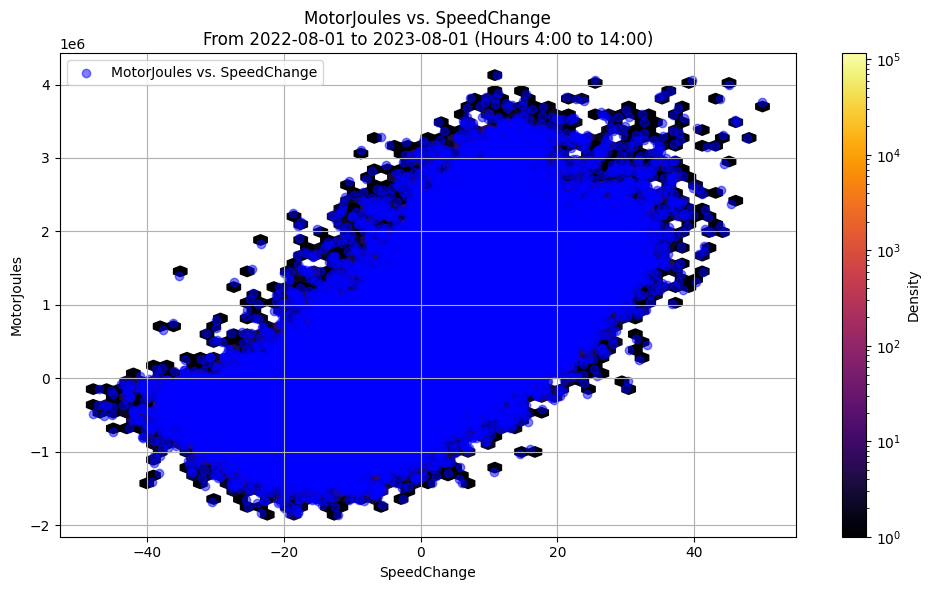

Number of rows before filtering: 298658
Number of rows after filtering: 297760


In [ ]:
#Plot MotorJoules against SpeedChange
# Ensure 'datetime' column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Define the date range and time range for filtering
start_date = '2022-08-01'  # Change to your desired start date
end_date = '2023-08-01'    # Change to your desired end date
start_time = 4   # Starting hour
end_time = 14    # Ending hour (not inclusive)

# Filter the dataframe for the specific date range
filtered_df = df[(df['datetime'] >= pd.to_datetime(start_date)) & 
                 (df['datetime'] <= pd.to_datetime(end_date))]

# Further filter the dataframe for the specific time range within each day
filtered_df = filtered_df[(filtered_df['datetime'].dt.hour >= start_time) & 
                          (filtered_df['datetime'].dt.hour < end_time)]

# Plot MotorJoules against SpeedChange with density
plt.figure(figsize=(10, 6))
plt.hexbin(filtered_df['SpeedChange'], filtered_df['MotorJoules'], gridsize=50, cmap='inferno', bins='log')
plt.colorbar(label='Density')

# Add scatter plot on top
plt.scatter(filtered_df['SpeedChange'], filtered_df['MotorJoules'], color='blue', alpha=0.5, label='MotorJoules vs. SpeedChange')

plt.xlabel('SpeedChange')
plt.ylabel('MotorJoules')
plt.title(f'MotorJoules vs. SpeedChange\nFrom {start_date} to {end_date} (Hours {start_time}:00 to {end_time}:00)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print number of rows before and after filtering
print(f"Number of rows before filtering: {df.shape[0]}")
print(f"Number of rows after filtering: {filtered_df.shape[0]}")

END OF PLOTTING BEASIC FEATURES AGAINST ENERGY USE

In [ ]:
raise SystemExit("Stopping execution of  END OF PLOT BASIC FEATURES AGAINST ENERGY USE.")

SystemExit: Stopping execution of  END OF PLOT BASIC FEATURES AGAINST ENERGY USE.

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


PLOT BASIC FEATURES AGAINST EACHOTHER

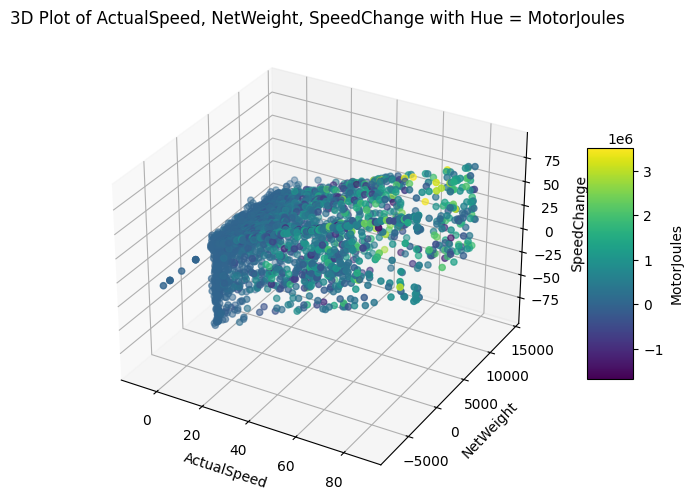

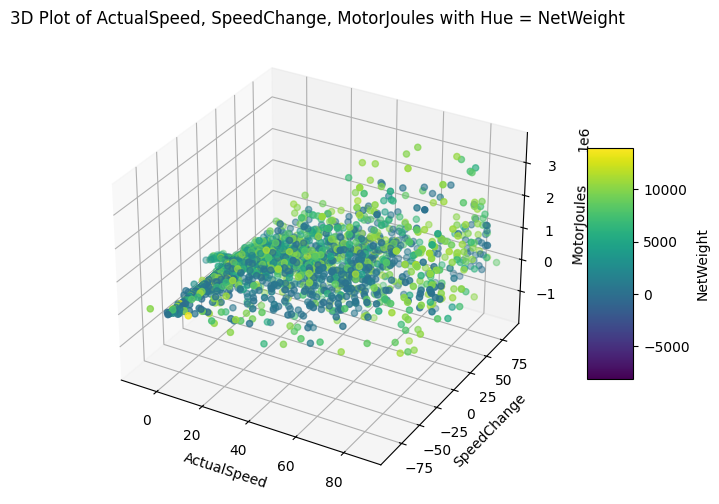

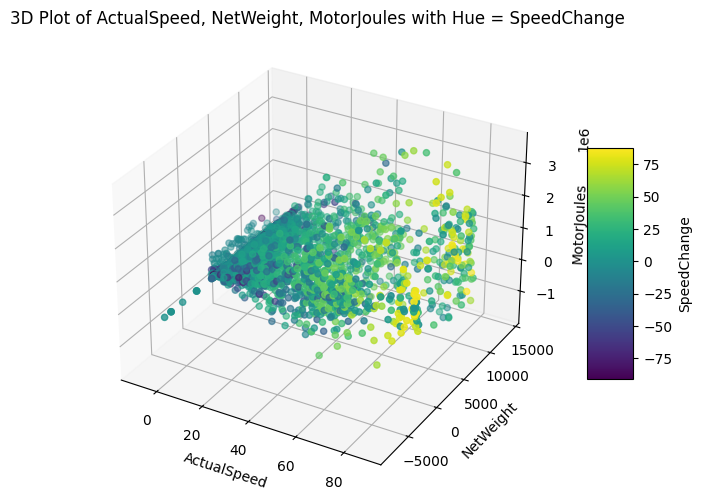

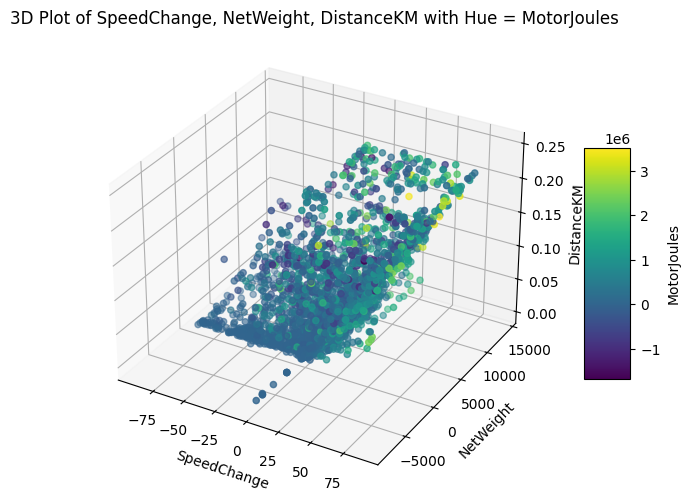

In [ ]:

#3d plot of the features against eachother
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a function for random sampling
def sample_data(df, sample_size=5000):
    return df.sample(n=min(sample_size, len(df)), random_state=42)

# Assuming df is your DataFrame already loaded with appropriate data
# and 'datetime' is the column containing the date and time information

# Convert 'datetime' column to datetime type if it's not already
df['datetime'] = pd.to_datetime(df['datetime'])

# Define the 'from' and 'to' dates
from_date = '2022-08-01'
to_date = '2023-08-01'

# Filter the dataframe for the specific date and time range
filtered_df = df[(df['datetime'].dt.date >= pd.to_datetime(from_date).date()) & 
                 (df['datetime'].dt.date <= pd.to_datetime(to_date).date()) &
                 (df['datetime'].dt.hour >= 4) & (df['datetime'].dt.hour < 14)]

# Sample the data to reduce the number of data points
filtered_df = sample_data(filtered_df)

# Ensure the data is sorted and calculate SpeedChange if not already done
filtered_df = filtered_df.sort_values(by='datetime')
filtered_df['SpeedChange'] = filtered_df['ActualSpeed'].diff()

# Ensure all necessary columns are numeric, handling any errors
filtered_df['ActualSpeed'] = pd.to_numeric(filtered_df['ActualSpeed'], errors='coerce')
filtered_df['NetWeight'] = pd.to_numeric(filtered_df['NetWeight'], errors='coerce')
filtered_df['SpeedChange'] = pd.to_numeric(filtered_df['SpeedChange'], errors='coerce')
filtered_df['DistanceKM'] = pd.to_numeric(filtered_df['DistanceKM'], errors='coerce')
filtered_df['MotorJoules'] = pd.to_numeric(filtered_df['MotorJoules'], errors='coerce')

# Drop rows with NaN values after coercing to numeric
filtered_df = filtered_df.dropna(subset=['ActualSpeed', 'NetWeight', 'SpeedChange', 'DistanceKM', 'MotorJoules'])

# Plotting the first 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# ActualSpeed, NetWeight, SpeedChange, Hue=MotorJoules
scatter = ax.scatter(filtered_df['ActualSpeed'], filtered_df['NetWeight'], filtered_df['SpeedChange'], 
                     c=filtered_df['MotorJoules'], cmap='viridis')

# Adding color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('MotorJoules')

# Setting labels
ax.set_xlabel('ActualSpeed')
ax.set_ylabel('NetWeight')
ax.set_zlabel('SpeedChange')
ax.set_title('3D Plot of ActualSpeed, NetWeight, SpeedChange with Hue = MotorJoules')

plt.show()

# Plotting the second 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# ActualSpeed, SpeedChange, MotorJoules, Hue=NetWeight
scatter = ax.scatter(filtered_df['ActualSpeed'], filtered_df['SpeedChange'], filtered_df['MotorJoules'], 
                     c=filtered_df['NetWeight'], cmap='viridis')

# Adding color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('NetWeight')

# Setting labels
ax.set_xlabel('ActualSpeed')
ax.set_ylabel('SpeedChange')
ax.set_zlabel('MotorJoules')
ax.set_title('3D Plot of ActualSpeed, SpeedChange, MotorJoules with Hue = NetWeight')

plt.show()

# Plotting the third 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# ActualSpeed, NetWeight, MotorJoules, Hue=SpeedChange
scatter = ax.scatter(filtered_df['ActualSpeed'], filtered_df['NetWeight'], filtered_df['MotorJoules'], 
                     c=filtered_df['SpeedChange'], cmap='viridis')

# Adding color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('SpeedChange')

# Setting labels
ax.set_xlabel('ActualSpeed')
ax.set_ylabel('NetWeight')
ax.set_zlabel('MotorJoules')
ax.set_title('3D Plot of ActualSpeed, NetWeight, MotorJoules with Hue = SpeedChange')

plt.show()

# Plotting the fourth 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# ASpeedChange, NetWeight, DistanceKM, Hue=MotorJoules
scatter = ax.scatter(filtered_df['SpeedChange'], filtered_df['NetWeight'], filtered_df['DistanceKM'], 
                     c=filtered_df['MotorJoules'], cmap='viridis')

# Adding color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('MotorJoules')

# Setting labels
ax.set_xlabel('SpeedChange')
ax.set_ylabel('NetWeight')
ax.set_zlabel('DistanceKM')
ax.set_title('3D Plot of SpeedChange, NetWeight, DistanceKM with Hue = MotorJoules')

plt.show()



END OF PLOTTING BASIC FEATURES AGAINST EACHOTHER

In [ ]:
raise SystemExit("Stopping execution of  END OF PLOTTING BASIC FEATURES AGAINST EACHOTHER.")

SystemExit: Stopping execution of  END OF PLOTTING BASIC FEATURES AGAINST EACHOTHER.

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
SAVE THE DF AS PARQUET

In [ ]:
df.columns  

Index(['datetime', 'MotorJoules', 'ActualSpeed', 'NetWeight', 'DistanceKM',
       'StopOnOff', 'ThrottlePerc', 'MotorUseCurrent', 'CompOnOff',
       'FC1Current', 'FC2Current', 'FC3Current', 'MotorTemp', 'TotalFCPower',
       'FC1AirFlow', 'FC3AirFlow', 'FC2AirFlow', 'BatTotalCurrent',
       'BattOutputPower', 'MotorTorque', 'FC1Cool', 'FC2Cool', 'FC3Cool',
       'TotalDistance', 'CompPower', 'FC3Volt', 'FC1Volt', 'FC2Volt',
       'BatMaxV', 'BatTotalVoltage', 'BatMinV', 'HVACDraw', 'H2Weight',
       'H2Press', 'BrakePerc', 'Signal', 'Is_Wednesday', 'BatSOC', 'Is_Friday',
       'H2Temp', 'Is_Sunday', 'AirTemp', 'Is_Saturday', 'Is_Thursday',
       'Is_Monday', 'Is_Tuesday', 'TotalPowerDraw', 'MotorRPM', 'TotalAxle',
       'H2Perc', 'AltChange', 'SpeedChange'],
      dtype='object')

In [ ]:
#Save the files a parquest and contunie modeling

# Define the file path where you want to save the Parquet file
file_path = '/home/joelva/code/pgt-group-3/data/processed/10_sec_processed/HECTORdataAggregated_20240615_1030.parquet'

# Save the DataFrame as a Parquet file
df.to_parquet(file_path)

print("DataFrame saved as Parquet file successfully.Yes!")

DataFrame saved as Parquet file successfully.Yes!


In [ ]:
raise SystemExit("Stopping execution of  DATA EXPLORATION AND DATA PREPARATION.")

SystemExit: Stopping execution of  DATA EXPLORATION AND DATA PREPARATION.

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3556: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


END OF NOTEBOOK